In [1]:
import pandas as pd
import numpy as np

In [2]:
list_of_DataFrames=pd.read_html('https://en.m.wikipedia.org/wiki/CSI_300_Index')

In [3]:
df=list_of_DataFrames[3]
print(len(df))

299


In [4]:
df.head(5)

,Index,Company,Stock exchange,Weighting (%),Segment
0,601318,Ping An Insurance,Shanghai,407,Financials
1,600016,China Minsheng Bank,Shanghai,254,Financials
2,601166,Industrial Bank,Shanghai,242,Financials
3,600036,China Merchants Bank,Shanghai,206,Financials
4,601328,Bank of Communications,Shanghai,181,Financials


In [5]:
L=[]
for i in range(len(df)):
    L.append(df["Index"][i])

In [6]:
s18=pd.read_csv("2018.csv")
s19=pd.read_csv("2019.csv")
s20=pd.read_csv("2020.csv")
s21=pd.read_csv("2021.csv")
s22=pd.read_csv("2022.csv")
fin=pd.read_csv("fin.csv")

In [7]:
print(len(s18),len(s19),len(s20),len(s21),len(s22),len(fin))

817340 885088 945951 1061598 1524813 121487


In [8]:
# Extract CSI300 stocks from universe of stocks in each data file
s18 = s18[s18['ts_code'].str.split('.').str[0].astype(int).isin(L)]
s19 = s19[s19['ts_code'].str.split('.').str[0].astype(int).isin(L)]
s20 = s20[s20['ts_code'].str.split('.').str[0].astype(int).isin(L)]
s21 = s21[s21['ts_code'].str.split('.').str[0].astype(int).isin(L)]
s22 = s22[s22['ts_code'].str.split('.').str[0].astype(int).isin(L)]
fin = fin[fin['ts_code'].str.split('.').str[0].astype(int).isin(L)]

In [9]:
print(len(s18),len(s19),len(s20),len(s21),len(s22),len(fin))

69635 72189 71462 71142 91302 7448


In [10]:
s18['ts_code'] = s18['ts_code'].str.split('.').str[0].astype(int)
s19['ts_code'] = s19['ts_code'].str.split('.').str[0].astype(int)
s20['ts_code'] = s20['ts_code'].str.split('.').str[0].astype(int)
s21['ts_code'] = s21['ts_code'].str.split('.').str[0].astype(int)
s22['ts_code'] = s22['ts_code'].str.split('.').str[0].astype(int)
fin['ts_code'] = fin['ts_code'].str.split('.').str[0].astype(int)

In [11]:
sector_set=set(df["Segment"])
print(len(sector_set))

10


In [12]:
print(sector_set)

{'Health Care', 'Consumer Staples', 'Industrials', 'Materials', 'IT', 'Utilities', 'Consumer Discretionary', 'Energy', 'Financials', 'Telecommunication Services'}


In [13]:
df1 = df.iloc[:, [0, -1]]
df1 = df1.rename(columns={'Index': 'ts_code'})

In [14]:
# Append "sector" column to daily market data (each year) and quarterly financials data (5 years)
s18 = s18.merge(df1,how='inner',on='ts_code')
s19 = s19.merge(df1,how='inner',on='ts_code')
s20 = s20.merge(df1,how='inner',on='ts_code')
s21 = s21.merge(df1,how='inner',on='ts_code')
s22 = s22.merge(df1,how='inner',on='ts_code')
fin = fin.merge(df1,how='inner',on='ts_code')

In [15]:
s18.to_csv('s18.csv', index=False)
s19.to_csv('s19.csv', index=False)
s20.to_csv('s20.csv', index=False)
s21.to_csv('s21.csv', index=False)
s22.to_csv('s22.csv', index=False)
fin.to_csv('sfin.csv', index=False)

In [16]:
# Combine five years of daily market data
slist=[s18,s19,s20,s21,s22]
sdf=pd.concat(slist)

In [17]:
# Convert PE column to reciprocal values and fill missing values with 0
sdf['pe'] = sdf['pe'].rdiv(1).fillna(0)

In [18]:
sdf['trade_date'] = pd.to_datetime(sdf['trade_date'])

In [19]:
# Divide daily market data into 10 dataframes by sector
Energy = sdf[sdf['Segment']=='Energy']
CD=sdf[sdf['Segment']=='Consumer Discretionary']
Util = sdf[sdf['Segment']=='Utilities']
CS = sdf[sdf['Segment']=='Consumer Staples']
IT = sdf[sdf['Segment']=='IT']
Indus = sdf[sdf['Segment']=='Industrials']
Finan = sdf[sdf['Segment']=='Financials']
Mat = sdf[sdf['Segment']=='Materials']
HC = sdf[sdf['Segment']=='Health Care']
TS = sdf[sdf['Segment']=='Telecommunication Services']
Lsector=[Energy,CD,Util,CS,IT,Indus,Finan,Mat,HC,TS]

In [20]:
# For each sector, check percentage of missing values for each factor and remove factors with too many missing values
m1 = round((Energy.isnull().sum()/len(Energy))*100,2)
m1

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm              7.57
pb                  0.00
ps                  0.00
ps_ttm              0.00
dv_ratio            0.66
dv_ttm             19.74
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.43
dtype: float64

In [21]:
Energy=Energy.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [22]:
m2 = round((CD.isnull().sum()/len(CD))*100,2)
m2

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm             18.03
pb                  0.00
ps                  0.00
ps_ttm              0.00
dv_ratio            0.67
dv_ttm             19.53
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.41
dtype: float64

In [23]:
CD=CD.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [24]:
m3 = round((Util.isnull().sum()/len(Util))*100,2)
m3

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.31
pe                  0.00
pe_ttm              9.01
pb                  0.00
ps                  0.00
ps_ttm              0.00
dv_ratio            0.66
dv_ttm              7.49
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.72
dtype: float64

In [25]:
Util=Util.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [26]:
m4 = round((CS.isnull().sum()/len(CS))*100,2)
m4

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.28
pe                  0.00
pe_ttm              8.58
pb                  0.94
ps                  0.00
ps_ttm              0.00
dv_ratio            0.67
dv_ttm             10.86
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.56
dtype: float64

In [27]:
CS=CS.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [28]:
m5 = round((IT.isnull().sum()/len(IT))*100,2)
m5

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm             22.00
pb                  1.69
ps                  0.00
ps_ttm              0.00
dv_ratio            0.65
dv_ttm             26.28
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 76.02
dtype: float64

In [29]:
IT=IT.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [30]:
m6 = round((Indus.isnull().sum()/len(Indus))*100,2)
m6

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.29
pe                  0.00
pe_ttm             11.49
pb                  0.48
ps                  0.00
ps_ttm              0.00
dv_ratio            0.65
dv_ttm             18.75
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 76.06
dtype: float64

In [31]:
Indus=Indus.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [32]:
m7 = round((Finan.isnull().sum()/len(Finan))*100,2)
m7

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.29
pe                  0.00
pe_ttm              5.86
pb                  0.50
ps                  0.69
ps_ttm              0.96
dv_ratio            0.65
dv_ttm             10.07
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.62
dtype: float64

In [33]:
Finan=Finan.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [34]:
m8 = round((Mat.isnull().sum()/len(Mat))*100,2)
m8

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm              7.11
pb                  0.14
ps                  0.00
ps_ttm              0.00
dv_ratio            0.66
dv_ttm             18.80
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.30
dtype: float64

In [35]:
Mat=Mat.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [36]:
m9 = round((HC.isnull().sum()/len(HC))*100,2)
m9

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm              2.28
pb                  0.00
ps                  0.00
ps_ttm              0.00
dv_ratio            0.66
dv_ttm              6.59
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 75.46
dtype: float64

In [37]:
HC=HC.drop(['id','dv_ttm'],axis=1)

In [38]:
m10 = round((TS.isnull().sum()/len(TS))*100,2)
m10

ts_code             0.00
trade_date          0.00
close               0.00
turnover_rate       0.00
turnover_rate_f     0.00
volume_ratio        0.30
pe                  0.00
pe_ttm             11.87
pb                  3.80
ps                  0.00
ps_ttm              0.00
dv_ratio            0.65
dv_ttm             23.78
total_share         0.00
float_share         0.00
free_share          0.00
total_mv            0.00
circ_mv             0.00
Segment             0.00
id                 76.62
dtype: float64

In [39]:
TS=TS.drop(['id','dv_ttm','pe_ttm'],axis=1)

In [40]:
# Aggregate daily market data to monthly market data and handle missing values
def monthly_converter(df):
    df = df.sort_values(['ts_code', 'trade_date'], ascending=[True, True])
    df['month']=df['trade_date'].dt.strftime('%Y-%m')
    data=df.drop(columns=['trade_date','Segment']).reset_index(drop=True)
    columns_to_replace = ['close', 'turnover_rate','turnover_rate_f','volume_ratio','pe','pb','ps','ps_ttm','dv_ratio','total_share','float_share','free_share','total_mv','circ_mv']
    m=data['month'][0]
    loc=0
    for i in range(len(data)):
        if data['month'][i]!=m:
            for column in columns_to_replace:
                mean_value = data.loc[loc:i-1, column].mean()
                data.loc[loc:i-1, column] = mean_value
            loc=i
            m=data['month'][i]

    k=data['month'][len(data)-1]
    s=data['ts_code'][len(data)-1]
    for i in range(len(data)):
        if data['month'][i]==k and data['ts_code'][i]==s:
            for column in columns_to_replace:
                mean_value = data.loc[i:len(data)-1, column].mean()
                data.loc[i:len(data)-1, column] = mean_value
            k=0
            s=0
    data=data.drop_duplicates().reset_index(drop=True)
    return data

In [41]:
m_Energy=monthly_converter(Energy)
m_CD=monthly_converter(CD)
m_Util=monthly_converter(Util)
m_CS=monthly_converter(CS)
m_IT=monthly_converter(IT)
m_Indus=monthly_converter(Indus)
m_Finan=monthly_converter(Finan)
m_Mat=monthly_converter(Mat)
m_TS=monthly_converter(TS)

In [42]:
# Aggregate daily market data to monthly market data and handle missing values, for Health Care sector only (since it has an extra factor)
HC = HC.sort_values(['ts_code', 'trade_date'], ascending=[True, True])
HC['month']=HC['trade_date'].dt.strftime('%Y-%m')
data=HC.drop(columns=['trade_date','Segment']).reset_index(drop=True)
columns_to_replace = ['close', 'turnover_rate','turnover_rate_f','pe_ttm','volume_ratio','pe','pb','ps','ps_ttm','dv_ratio','total_share','float_share','free_share','total_mv','circ_mv']
m=data['month'][0]
loc=0
for i in range(len(data)):
    if data['month'][i]!=m:
        for column in columns_to_replace:
            mean_value = data.loc[loc:i-1, column].mean()
            data.loc[loc:i-1, column] = mean_value
        loc=i
        m=data['month'][i]

k=data['month'][len(data)-1]
s=data['ts_code'][len(data)-1]
for i in range(len(data)):
    if data['month'][i]==k and data['ts_code'][i]==s:
        for column in columns_to_replace:
            mean_value = data.loc[i:len(data)-1, column].mean()
            data.loc[i:len(data)-1, column] = mean_value
        k=0
        s=0
m_HC=data.drop_duplicates().reset_index(drop=True)

In [43]:
a=len(m_Energy)+len(m_CD)+len(m_Util)+len(m_CS)+len(m_IT)+len(m_Indus)+len(m_Finan)+len(m_Mat)+len(m_TS)+len(m_HC)
print(a)

18484


In [44]:
def string_converter(df):
    for i in range(len(df)):
        df.loc[i, 'ts_code'] = "{:06d}".format(df.loc[i, 'ts_code'])
    return df

In [45]:
def return_adder(df):
    l=df['ts_code'][0]
    Ls=[]
    loc=0
    for i in range(len(df)):
        if df['ts_code'][i]!=l:
            tem=df.iloc[loc:i, :].copy()
            tem['Return'] = (tem['close'].shift(-1) - tem['close']) / tem['close']
            Ls.append(tem)
            loc=i
            l=df['ts_code'][i]
    
    q=df['ts_code'][len(df)-1]
    for i in range(len(df)):
        if df['ts_code'][i]==q:
            tem=df.iloc[i:len(df), :].copy()
            tem['Return'] = (tem['close'].shift(-1) - tem['close']) / tem['close']
            Ls.append(tem)
            q=0
    df=pd.concat(Ls)
    return df

In [46]:
def reorder_columns(df):
    df = df.reindex(columns=['ts_code', 'month', 'close', 'Return','turnover_rate','turnover_rate_f','volume_ratio','pe','pb','ps','ps_ttm','dv_ratio','total_share','float_share','free_share','total_mv','circ_mv'])
    return df

In [47]:
def reorder_columns_HC(df):
    df = df.reindex(columns=['ts_code', 'month', 'close', 'Return','turnover_rate','turnover_rate_f','pe_ttm','volume_ratio','pe','pb','ps','ps_ttm','dv_ratio','total_share','float_share','free_share','total_mv','circ_mv'])
    return df

In [48]:
# For each sector's dataframe, perform the following:
# 1.Append 'return' column for percent change of return from month to month
# 2.Move month column from far right to 2nd column for convenience
# 3.Convert ts_code（ticker) from integer to string type 
m_HC = string_converter(reorder_columns_HC(return_adder(m_HC)))
m_Energy=string_converter(reorder_columns(return_adder(m_Energy)))
m_CD=string_converter(reorder_columns(return_adder(m_CD)))
m_Util=string_converter(reorder_columns(return_adder(m_Util)))
m_CS=string_converter(reorder_columns(return_adder(m_CS)))
m_IT=string_converter(reorder_columns(return_adder(m_IT)))
m_Indus=string_converter(reorder_columns(return_adder(m_Indus)))
m_Finan=string_converter(reorder_columns(return_adder(m_Finan)))
m_Mat=string_converter(reorder_columns(return_adder(m_Mat)))
m_TS=string_converter(reorder_columns(return_adder(m_TS)))

In [49]:
m_HC.to_csv('m_HC.csv',index=False)
m_Energy.to_csv('m_Energy.csv',index=False)
m_CD.to_csv('m_CD.csv',index=False)
m_Util.to_csv('m_Util.csv',index=False)
m_CS.to_csv('m_CS.csv',index=False)
m_IT.to_csv('m_IT.csv',index=False)
m_Indus.to_csv('m_Indus.csv',index=False)
m_Finan.to_csv('m_Finan.csv',index=False)
m_Mat.to_csv('m_Mat.csv',index=False)
m_TS.to_csv('m_TS.csv',index=False)

In [50]:
# Start processing the quarterly financials dataframe
fin.drop_duplicates(subset=['ts_code', 'end_date'], keep='last', inplace=True, ignore_index=True)
fin.sort_values(['ts_code', 'end_date'], inplace=True, ignore_index=True)
fin = fin.loc[fin.index.repeat(3)].reset_index(drop=True)
fin.drop(columns=['ann_date','update_flag'], inplace=True)

In [51]:
# Convert quarterly financials data to monthly frequency
def fin_monthly_converter(df):
    df['end_date'] = pd.to_datetime(df['end_date'])

    ctr=0
    prev_month = df['end_date'][0]
    prev_loc = 0
    # For every end-of-quarter month, go back two rows and update month column to be the two months before this end-of-quarter month
    # e.g. if we reached 2022-06, update the previous row to be 2022-05 and the second previous row to be 2022-04
    for i in range(len(df)):
        if df['end_date'][i] != prev_month:
            ctr += 1
            for x in range(2):
                df.loc[i-x-2,'end_date'] = df.loc[i-x-1,'end_date'] - pd.DateOffset(months=1) 

            prev_month = df.loc[i,'end_date']
            prev_loc = i
            
    # Handle last three months
    for y in range(2):
        df.loc[len(df)-y-2,'end_date'] = df.loc[len(df)-y-1,'end_date'] - pd.DateOffset(months=1) 
        
    df['end_date'] = df['end_date'].dt.strftime('%Y-%m')
    df = df.rename(columns={'end_date': 'month'})
    return df
        
m_fin = fin_monthly_converter(fin)
m_fin = string_converter(m_fin)
display(m_fin)

,ts_code,month,eps,dt_eps,total_revenue_ps,revenue_ps,capital_rese_ps,surplus_rese_ps,undist_profit_ps,extra_item,...,q_sales_qoq,q_op_yoy,q_op_qoq,q_profit_yoy,q_profit_qoq,q_netprofit_yoy,q_netprofit_qoq,equity_yoy,rd_exp,Segment
0,000001,2018-01,0.330,0.330,1.6323,1.6323,3.2886,0.6279,4.6852,4.000000e+07,...,7.9875,4.1495,64.3500,6.1313,63.4044,6.1313,63.4044,7.5345,NaN,Financials
1,000001,2018-02,0.330,0.330,1.6323,1.6323,3.2886,0.6279,4.6852,4.000000e+07,...,7.9875,4.1495,64.3500,6.1313,63.4044,6.1313,63.4044,7.5345,NaN,Financials
2,000001,2018-03,0.330,0.330,1.6323,1.6323,3.2886,0.6279,4.6852,4.000000e+07,...,7.9875,4.1495,64.3500,6.1313,63.4044,6.1313,63.4044,7.5345,NaN,Financials
3,000001,2018-04,0.730,0.730,3.3338,3.3338,3.2886,0.6279,4.9440,4.600000e+07,...,4.2425,7.2488,2.7260,6.8927,2.7597,6.8927,2.7597,7.8916,NaN,Financials
4,000001,2018-05,0.730,0.730,3.3338,3.3338,3.2886,0.6279,4.9440,4.600000e+07,...,4.2425,7.2488,2.7260,6.8927,2.7597,6.8927,2.7597,7.8916,NaN,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17083,603993,2022-08,0.248,0.248,6.1330,6.1330,1.2811,0.0678,0.8093,6.021143e+08,...,-13.8442,-25.4836,-67.8298,1.7681,-52.0196,0.7342,-50.8461,28.8586,3.167865e+08,Materials
17084,603993,2022-09,0.248,0.248,6.1330,6.1330,1.2811,0.0678,0.8093,6.021143e+08,...,-13.8442,-25.4836,-67.8298,1.7681,-52.0196,0.7342,-50.8461,28.8586,3.167865e+08,Materials
17085,603993,2022-10,0.280,0.280,8.0091,8.0091,1.2816,0.0780,0.8343,3.821469e+04,...,-0.4407,-81.9946,-71.2237,-20.2435,-31.3856,-50.8343,-34.2818,29.7482,3.886097e+08,Materials
17086,603993,2022-11,0.280,0.280,8.0091,8.0091,1.2816,0.0780,0.8343,3.821469e+04,...,-0.4407,-81.9946,-71.2237,-20.2435,-31.3856,-50.8343,-34.2818,29.7482,3.886097e+08,Materials


In [52]:
# Divide monthly financials data into 10 dataframes by sector
mf_Energy = m_fin[m_fin['Segment']=='Energy']
mf_CD = m_fin[m_fin['Segment']=='Consumer Discretionary']
mf_Util = m_fin[m_fin['Segment']=='Utilities']
mf_CS = m_fin[m_fin['Segment']=='Consumer Staples']
mf_IT = m_fin[m_fin['Segment']=='IT']
mf_Indus = m_fin[m_fin['Segment']=='Industrials']
mf_Finan = m_fin[m_fin['Segment']=='Financials']
mf_Mat = m_fin[m_fin['Segment']=='Materials']
mf_HC = m_fin[m_fin['Segment']=='Health Care']
mf_TS = m_fin[m_fin['Segment']=='Telecommunication Services']

In [53]:
# Merge monthly financials data into monthly stock price data for each sector
mm_Energy = m_Energy.merge(mf_Energy, how='inner', on=['ts_code','month'])
mm_CD = m_CD.merge(mf_CD, how='inner', on=['ts_code','month'])
mm_Util = m_Util.merge(mf_Util, how='inner', on=['ts_code','month'])
mm_CS = m_CS.merge(mf_CS, how='inner', on=['ts_code','month'])
mm_IT = m_IT.merge(mf_IT, how='inner', on=['ts_code','month'])
mm_Indus = m_Indus.merge(mf_Indus, how='inner', on=['ts_code','month'])
mm_Finan = m_Finan.merge(mf_Finan, how='inner', on=['ts_code','month'])
mm_Mat = m_Mat.merge(mf_Mat, how='inner', on=['ts_code','month'])
mm_HC = m_HC.merge(mf_HC, how='inner', on=['ts_code','month'])
mm_TS = m_TS.merge(mf_TS, how='inner', on=['ts_code','month'])

In [54]:
# For each sector, check percentage of missing values for each factor after merge 
def missing_value_pct(df):
    return round((df.isnull().sum()/len(df))*100,2).values

In [55]:
missing_value_pct(mm_Energy)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.56,
       18.32,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.7 ,  1.7 ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  2.56,  0.  ,  2.56,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , 14.49, 50.85,  0.  , 50.85,  0.43,  0.43,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.43,  0.  ,  0.43,  0.  ,  0.43,  0.43,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 19.6 ,  0.  ,
        0.  ,  0.  ,  0.  ,  7.24,  1.7 ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  , 52.13,  8.95,  8.95,  8.95,  8.95, 11.08,  0.43,  0.43,
       15.2 , 50.85,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.43,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       33.66,  0.43,  0.43, 34.09, 19.6 , 48.86, 50.85,  0.  ,  0.  ,
        0.  ,  0.43,  0.  ,  0.  ,  8.95,  8.95, 10.23,  0.  ,  3.41,
        0.  ,  0.  ,

In [56]:
missing_value_pct(mm_CD)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.52,
       11.41,  0.  ,  0.  ,  0.  ,  0.39,  0.  ,  0.39,  0.39,  0.  ,
        0.  ,  0.  ,  0.  ,  1.57,  0.52,  1.57,  0.52,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , 12.11, 53.02,  0.  , 53.02,  3.02,  3.02,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.26,  0.  ,  0.26,  0.  ,  3.02,  3.02,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 13.24,  0.  ,
        0.  ,  0.  ,  0.  ,  2.75,  0.39,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  , 52.1 , 13.59, 13.59, 13.59, 13.59, 14.38,  0.26,  0.26,
       29.46, 53.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.26,  0.  ,  0.  ,  5.81,  0.  ,  5.81,
       56.12,  0.26,  5.94, 56.25, 43.58, 15.95, 53.02,  0.  ,  0.  ,
        0.  ,  0.26,  0.  ,  0.  , 13.59, 13.59, 15.25,  0.  ,  6.99,
        0.  ,  0.  ,

In [57]:
missing_value_pct(mm_Util)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.15,
        9.22,  0.58,  0.58,  0.86,  0.58,  0.58,  1.15,  1.15,  0.29,
        0.58,  0.58,  0.58,  0.58,  1.15,  0.58,  1.15,  0.58,  0.29,
        0.58,  0.29,  4.03, 13.26, 52.45,  0.29, 52.16,  1.73,  1.73,
        0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,
        0.58,  0.58,  0.58,  0.58,  0.86,  0.58,  1.73,  1.73,  0.29,
        0.29,  0.29,  0.29,  0.29, 23.92,  0.29,  0.29, 36.31,  0.29,
        0.29,  0.29,  0.29,  5.19,  1.15,  0.29,  0.29,  0.29,  0.29,
        0.29, 52.74,  5.19,  8.93,  5.19,  5.19,  5.76,  0.29,  0.29,
       15.56, 52.45,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,
        0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,  0.58,
        0.58,  0.58,  0.58,  0.58,  0.58, 75.5 , 52.74,  0.58,  0.29,
        0.58,  0.58,  0.29,  0.29,  5.19,  5.19,  5.19,  0.58,  0.58,
        0.58,  0.58,

In [58]:
missing_value_pct(mm_CS)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.95,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.26,
        0.26,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.26,  0.26,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  5.21,  0.  ,  5.21,  0.  ,  0.  ,
        0.  ,  0.  ,  8.33, 12.76, 52.08,  0.  , 52.08,  1.22,  1.22,
        0.  ,  0.52,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.26,  0.  ,  0.26,  0.  ,  1.22,  1.22,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 25.26,  0.  ,
        0.  ,  0.  ,  1.04,  3.65,  1.3 ,  0.  ,  0.  ,  0.  ,  1.04,
        0.  , 52.6 ,  8.25, 16.06,  8.25,  8.25,  8.51,  0.26,  0.26,
        9.03, 52.08,  0.  ,  1.04,  1.3 ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.52,  0.26,  1.04,  0.  ,  9.2 ,  0.  ,  9.2 ,
       59.98,  0.26,  9.46, 60.24, 45.4 , 19.27, 52.08,  0.  ,  0.  ,
        0.26,  0.26,  0.  ,  0.  ,  8.25,  8.25,  8.51,  0.  , 14.67,
        0.  ,  0.  ,

In [59]:
missing_value_pct(mm_IT)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.27,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.49,
        0.65,  0.  ,  0.  ,  2.12,  0.  ,  0.  ,  0.49,  0.49,  0.  ,
        0.  ,  0.  ,  0.  ,  7.17,  0.16,  7.17,  0.16,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , 12.06, 51.98,  0.  , 51.98,  5.05,  5.05,
        0.  ,  2.12,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  5.05,  5.05,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 16.78,  0.  ,
        0.  ,  0.  ,  0.65,  2.44,  0.98,  0.  ,  0.  ,  0.  ,  0.65,
        0.  , 52.31, 22.16, 22.16, 22.32, 22.16, 21.02,  0.  ,  0.  ,
       31.88, 51.98,  0.  ,  0.65,  0.81,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  2.12,  0.  ,  0.65,  0.  ,  5.38,  0.  ,  5.38,
       52.47,  0.  ,  5.38, 52.47, 31.61, 14.83, 51.98,  0.  ,  0.  ,
        0.16,  0.33,  0.  ,  0.  , 22.16, 22.16, 23.41,  0.  ,  6.36,
        0.  ,  0.  ,

In [60]:
missing_value_pct(mm_Indus)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.35,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.9 ,
        6.39,  0.25,  0.25,  0.33,  0.49,  0.33,  0.41,  0.41,  0.  ,
        0.33,  0.33,  0.33,  0.41,  1.47,  0.41,  1.47,  0.33,  0.  ,
        0.33,  0.  ,  0.82, 12.39, 51.64,  0.  , 51.64,  3.36,  3.36,
        0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,
        0.25,  0.33,  0.49,  0.33,  0.57,  0.25,  3.36,  3.36,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  2.46,  0.  ,  0.  , 21.48,  0.  ,
        0.  ,  0.  ,  0.41,  4.91,  0.82,  0.  ,  0.  ,  0.  ,  0.41,
        0.  , 50.9 , 11.87, 12.69, 11.87, 11.87, 12.12,  0.33,  0.41,
       22.41, 51.64,  0.33,  0.82,  0.74,  0.33,  0.33,  0.33,  0.33,
        0.33,  0.33,  0.33,  0.66,  0.82,  0.33,  1.72,  0.33,  1.72,
       32.1 ,  0.66,  2.05, 32.34, 21.72, 24.62, 51.88,  0.33,  0.  ,
        0.33,  0.41,  0.  ,  0.  , 11.87, 11.87, 12.64,  0.33,  1.8 ,
        0.33,  0.33,

In [61]:
missing_value_pct(mm_Finan)

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 3.600e-01, 6.300e-01, 9.400e-01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.810e+00,
       5.210e+00, 1.700e-01, 1.020e+00, 8.300e-01, 1.700e-01, 1.700e-01,
       2.900e+00, 2.900e+00, 7.308e+01, 5.552e+01, 5.552e+01, 7.231e+01,
       7.317e+01, 7.325e+01, 7.317e+01, 7.325e+01, 7.231e+01, 7.223e+01,
       8.000e-02, 0.000e+00, 8.000e-02, 7.634e+01, 5.554e+01, 7.223e+01,
       8.657e+01, 4.534e+01, 7.330e+01, 7.231e+01, 7.239e+01, 7.231e+01,
       7.231e+01, 7.231e+01, 7.231e+01, 7.231e+01, 7.231e+01, 1.700e-01,
       1.700e-01, 1.700e-01, 4.100e-01, 1.700e-01, 5.000e-01, 7.231e+01,
       7.330e+01, 7.330e+01, 1.190e+00, 7.308e+01, 7.308e+01, 7.308e+01,
       3.300e-01, 7.474e+01, 4.100e-01, 7.308e+01, 6.415e+01, 7.223e+01,
       4.100e-01, 7.223e+01, 2.500e-01, 4.380e+00, 3.140e+00, 7.223e+01,
       0.000e+00, 7.223e+01, 2.500e-01, 7.223e+01, 

In [62]:
missing_value_pct(mm_Mat)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.22,
       11.26,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.22,  0.22,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.22,  0.  ,  0.22,  0.  ,  0.  ,
        0.  ,  0.  ,  0.22,  8.85, 51.75,  0.  , 51.75,  0.44,  0.44,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.44,  0.  ,  0.66,  0.  ,  0.44,  0.44,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 13.38,  0.  ,
        0.  ,  0.  ,  0.51,  4.24,  0.73,  0.  ,  0.  ,  0.  ,  0.51,
        0.  , 51.17,  4.61,  4.82,  4.61,  4.61,  5.04,  0.66,  0.44,
        7.46, 51.97,  0.  ,  0.51,  0.51,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.44,  0.51,  0.  ,  1.75,  0.  ,  1.75,
       11.55,  0.44,  2.19, 11.77,  9.14, 43.93, 51.75,  0.  ,  0.  ,
        0.  ,  0.22,  0.  ,  0.  ,  4.61,  4.61,  5.04,  0.  ,  1.97,
        0.  ,  0.  ,

In [63]:
missing_value_pct(mm_HC)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.08,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  5.42,  0.  ,  0.  ,  1.08,  0.  ,  0.  ,  0.27,  0.27,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.81, 12.39, 51.18,  0.  , 51.18,  0.81,
        0.81,  0.  ,  1.9 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.81,  0.81,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 17.09,
        0.  ,  0.  ,  0.  ,  0.  ,  1.63,  0.27,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  , 49.28,  2.17,  2.98,  2.17,  2.17,  2.71,  0.  ,
        0.  ,  3.25, 51.18,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  1.9 ,  0.  ,  0.  ,  0.  , 15.46,  0.  ,
       15.46, 62.03,  0.  , 15.46, 62.03, 43.67,  3.25, 51.18,  0.  ,
        0.  ,  0.  ,  0.27,  0.  ,  0.  ,  2.17,  2.17,  2.44,  0.  ,
       17.36,  0.  ,

In [64]:
missing_value_pct(mm_TS)

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.68,
        3.35,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.68,  1.68,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  6.7 ,  0.  ,  6.7 ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  5.03, 50.28,  0.  , 50.28,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 10.06,  0.  ,
        0.  ,  0.  ,  0.  ,  1.68,  1.68,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  , 38.55,  6.15,  6.15,  6.15,  6.15,  7.82,  0.  ,  0.  ,
        9.5 , 50.28,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       56.98,  0.  ,  0.  , 56.98, 40.22, 33.52, 50.28,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  6.15,  6.15,  4.47,  0.  ,  0.  ,
        0.  ,  0.  ,

In [65]:
def get_cols_to_del(df, nan_percent):
    threshold = len(df) * nan_percent
    return [c for c in df.columns if df[c].isnull().sum() >= threshold]

In [66]:
# For each sector, remove factors with too many missing values (which exceeds a certain threshold)
cols_to_del = get_cols_to_del(mm_Energy, 0.05)
print(cols_to_del)
mm_Energy.dropna(axis=1, thresh=0.95*len(mm_Energy), inplace=True)
print(missing_value_pct(mm_Energy))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_waa', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'tangibleasset_to_netdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   2.56 0.   0.   0.   0.   0.   1.7  1.7  0.   0.   0.
 0.   0.   2.56 0.   2.56 0.   0.   0.   0.   0.   0.   0.43 0.43 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.43 0.   0.43 0.
 0.43 0.43 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 1.7  0.   0.   0.   0.   0.   0.43 0.43 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.43 0.   0.   0.   0.   0.   0.43 0.43 0.   0.
 0.   0

In [67]:
cols_to_del = get_cols_to_del(mm_CD, 0.05)
print(cols_to_del)
mm_CD.dropna(axis=1, thresh=0.95*len(mm_CD), inplace=True)
print(missing_value_pct(mm_CD))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'eqt_to_interestdebt', 'tangasset_to_intdebt', 'tangibleasset_to_netdebt', 'ocf_to_interestdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'cash_to_liqdebt_withinterest', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.52 0.   0.   0.   0.39 0.   0.39 0.39 0.   0.   0.
 0.   1.57 0.52 1.57 0.52 0.   0.   0.   0.   0.   0.   3.02 3.02 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.26 0.   0.26 0.
 3.02 3.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 2.75 0.39 0.   0.   0.   0.   0.   0.26 0.26 0.   0. 

In [68]:
cols_to_del = get_cols_to_del(mm_Util, 0.05)
print(cols_to_del)
mm_Util.dropna(axis=1, thresh=0.95*len(mm_Util), inplace=True)
print(missing_value_pct(mm_Util))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'saleexp_to_gr', 'impai_ttm', 'roe_waa', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'q_saleexp_to_gr', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.15 0.58 0.58 0.86 0.58 0.58 1.15 1.15 0.29 0.58 0.58
 0.58 0.58 1.15 0.58 1.15 0.58 0.29 0.58 0.29 4.03 0.29 1.73 1.73 0.58
 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.86 0.58
 1.73 1.73 0.29 0.29 0.29 0.29 0.29 0.29 0.29 0.29 0.29 0.29 0.29 1.15
 0.29 0.29 0.29 0.29 0.29 0.29 0.29 0.58 0.58 0.58 0.58 0.58 0.58 0.58
 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58
 0.58 0.29 0.58 0.58 0.29

In [69]:
cols_to_del = get_cols_to_del(mm_CS, 0.05)
print(cols_to_del)
mm_CS.dropna(axis=1, thresh=0.95*len(mm_CS), inplace=True)
print(missing_value_pct(mm_CS))

['arturn_days', 'ar_turn', 'valuechange_income', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'eqt_to_interestdebt', 'tangasset_to_intdebt', 'tangibleasset_to_netdebt', 'ocf_to_interestdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'cash_to_liqdebt_withinterest', 'q_investincome', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.
 0.   0.   0.   0.26 0.26 0.   0.   0.   0.   0.   0.26 0.26 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   1.22 1.22 0.   0.52 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.26 0.   0.26 0.   1.22 1.22
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.04 3.65 1.3
 0.   0. 

In [70]:
cols_to_del = get_cols_to_del(mm_IT, 0.05)
print(cols_to_del)
mm_IT.dropna(axis=1, thresh=0.95*len(mm_IT), inplace=True)
print(missing_value_pct(mm_IT))

['invturn_days', 'inv_turn', 'interst_income', 'daa', 'ebitda', 'fcff', 'fcfe', 'fcff_ps', 'fcfe_ps', 'impai_ttm', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'eqt_to_interestdebt', 'tangasset_to_intdebt', 'tangibleasset_to_netdebt', 'ocf_to_interestdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'cash_to_liqdebt_withinterest', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.27 0.   0.   0.   0.   0.
 0.   0.   0.   0.49 0.65 0.   0.   2.12 0.   0.   0.49 0.49 0.   0.
 0.   0.   0.16 0.16 0.   0.   0.   0.   0.   0.   0.   2.12 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.65 2.44 0.98 0.   0.   0.
 0.65 0.   0

In [71]:
cols_to_del = get_cols_to_del(mm_Indus, 0.05)
print(cols_to_del)
mm_Indus.dropna(axis=1, thresh=0.95*len(mm_Indus), inplace=True)
print(missing_value_pct(mm_Indus))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'tangibleasset_to_netdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'ocf_to_profit', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.35 0.   0.   0.   0.   0.
 0.   0.   0.   0.9  0.25 0.25 0.33 0.49 0.33 0.41 0.41 0.   0.33 0.33
 0.33 0.41 1.47 0.41 1.47 0.33 0.   0.33 0.   0.82 0.   3.36 3.36 0.33
 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.33 0.25 0.33 0.49 0.33 0.57 0.25
 3.36 3.36 0.   0.   0.   0.   0.   2.46 0.   0.   0.   0.   0.   0.41
 4.91 0.82 0.   0.   0.   0.41 0.   0.33 0.41 0.33 0.82 0.74 0.33 0.33
 0.33 0.33 0.33 0.33 0.33 0.66 0.82 0.33 1.72 0.33 1.72 0.66 2.05 0.33
 0.   

In [72]:
cols_to_del = get_cols_to_del(mm_Finan, 0.05)
print(cols_to_del)
mm_Finan.dropna(axis=1, thresh=0.95*len(mm_Finan), inplace=True)
print(missing_value_pct(mm_Finan))

['dt_eps', 'gross_margin', 'current_ratio', 'quick_ratio', 'cash_ratio', 'invturn_days', 'arturn_days', 'inv_turn', 'ar_turn', 'ca_turn', 'fa_turn', 'interst_income', 'daa', 'ebit', 'ebitda', 'fcff', 'fcfe', 'current_exint', 'noncurrent_exint', 'interestdebt', 'netdebt', 'tangible_asset', 'working_capital', 'networking_capital', 'invest_capital', 'ebit_ps', 'fcff_ps', 'fcfe_ps', 'grossprofit_margin', 'cogs_of_sales', 'expense_of_sales', 'saleexp_to_gr', 'finaexp_of_gr', 'impai_ttm', 'gc_of_gr', 'ebit_of_gr', 'roa', 'roic', 'roa2_yearly', 'roe_avg', 'n_op_profit_of_ebt', 'dtprofit_to_profit', 'salescash_to_or', 'ocf_to_opincome', 'capitalized_to_da', 'ca_to_assets', 'nca_to_assets', 'tbassets_to_totalassets', 'int_to_talcap', 'eqt_to_talcapital', 'currentdebt_to_debt', 'longdeb_to_debt', 'ocf_to_shortdebt', 'eqt_to_interestdebt', 'tangibleasset_to_debt', 'tangasset_to_intdebt', 'tangibleasset_to_netdebt', 'ocf_to_interestdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingc

In [73]:
cols_to_del = get_cols_to_del(mm_Mat, 0.05)
print(cols_to_del)
mm_Mat.dropna(axis=1, thresh=0.95*len(mm_Mat), inplace=True)
print(missing_value_pct(mm_Mat))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'tangibleasset_to_netdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'ocf_to_profit', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.22 0.   0.   0.   0.   0.   0.22 0.22 0.   0.   0.
 0.   0.   0.22 0.   0.22 0.   0.   0.   0.   0.22 0.   0.44 0.44 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.44 0.   0.66 0.
 0.44 0.44 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.51
 4.24 0.73 0.   0.   0.   0.51 0.   4.61 4.82 4.61 4.61 0.66 0.44 0.
 0.51 0.51 0.   0.   0.   0.   0.   0.   0.   0.44 0.51 0.   1.75 0.
 1.75 0.44 2.19 0.   0.   0.   0.22 0.   0.   4.61 4.61 0.   1.97 0.
 0.   0.   0.22 0.   0.   0.22 0.22 0.   0.66 0.66 0

In [74]:
cols_to_del = get_cols_to_del(mm_HC, 0.05)
print(cols_to_del)
mm_HC.dropna(axis=1, thresh=0.95*len(mm_HC), inplace=True)
print(missing_value_pct(mm_HC))

['dt_eps', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'capitalized_to_da', 'eqt_to_interestdebt', 'tangasset_to_intdebt', 'tangibleasset_to_netdebt', 'ocf_to_interestdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'ebitda_to_debt', 'cash_to_liqdebt_withinterest', 'q_impair_to_gr_ttm', 'q_opincome_to_ebt', 'q_investincome_to_ebt', 'q_dtprofit_to_profit', 'q_ocf_to_or', 'dt_eps_yoy', 'rd_exp']
[0.   0.   0.   0.   0.   0.   2.08 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   1.08 0.   0.   0.27 0.27 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.81 0.   0.81 0.81
 0.   1.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.81 0.81 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   1.63 0.27 0.   0.   0.   0.   0.   2.17 2.98 2.17 2.17 2.71 0.
 0.   3.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   1.9  0.   0.
 0.   0.   0.   3.25 0.   0.   0.   0.27 0.   0.   2.17 2.17 2.44 0.
 0.   0.   0.   0.27 0.   0.27 1.08 0.

In [75]:
cols_to_del = get_cols_to_del(mm_TS, 0.05)
print(cols_to_del)
mm_TS.dropna(axis=1, thresh=0.95*len(mm_TS), inplace=True)
print(missing_value_pct(mm_TS))

['arturn_days', 'ar_turn', 'interst_income', 'daa', 'ebitda', 'impai_ttm', 'roe_avg', 'opincome_of_ebt', 'investincome_of_ebt', 'n_op_profit_of_ebt', 'tax_to_ebt', 'dtprofit_to_profit', 'ocf_to_opincome', 'capitalized_to_da', 'tangibleasset_to_netdebt', 'ocf_to_netdebt', 'ebit_to_interest', 'longdebt_to_workingcapital', 'ebitda_to_debt', 'op_to_ebt', 'nop_to_ebt', 'q_impair_to_gr_ttm', 'q_ocf_to_or', 'rd_exp']
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   1.68 3.35 0.   0.   0.   0.   0.   1.68 1.68 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.68
 1.68 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   4.47 0.   0.   0.   0.   0.   0.   0.   0.   0.
 1.68 0.   0.   0.   0.   0.   0

In [76]:
mm_HC.to_csv('mm_HC.csv',index=False)
mm_Energy.to_csv('mm_Energy.csv',index=False)
mm_CD.to_csv('mm_CD.csv',index=False)
mm_Util.to_csv('mm_Util.csv',index=False)
mm_CS.to_csv('mm_CS.csv',index=False)
mm_IT.to_csv('mm_IT.csv',index=False)
mm_Indus.to_csv('mm_Indus.csv',index=False)
mm_Finan.to_csv('mm_Finan.csv',index=False)
mm_Mat.to_csv('mm_Mat.csv',index=False)
mm_TS.to_csv('mm_TS.csv',index=False)

In [77]:
# Stack each sector's dataframe (without financials data) by date and ts_code(ticker)
m_sector = [m_Energy,m_CD,m_Util,m_CS,m_IT,m_Indus,m_Finan,m_Mat,m_HC,m_TS]
for df in m_sector:
    df.sort_values(by=['month'], inplace=True)
    df.set_index(['month','ts_code'], inplace=True)
    df.stack()
    display(df)

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 600028    7.060455 -0.040666       0.401818         3.941364   
        601808   12.305909 -0.086618       0.659091         3.549545   
        600256    5.005000 -0.111555       1.235000         2.134091   
        600188   16.686364  0.016039       1.550000         9.091818   
        600583    6.761818 -0.019692       0.865909         2.064091   
...                    ...       ...            ...              ...   
2023-03 600188   32.741053       NaN       0.752632         3.100526   
        601857    5.589474       NaN       0.145789         2.081579   
        600157    1.562632       NaN       0.837368         1.020526   
        600583    6.573684       NaN       0.870526         1.933684   
        601898    8.697895       NaN       0.373684         2.206842   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 600028       1.238636  0.054364  1.194091  0.442273  0.369545   
        601808       1.327273  0.000000  1.703636  3.875000  3.645455   
        600256       0.957727  0.007874  2.339545  6.230000  4.374545   
        600188       1.070909  0.025245  1.524091  0.803636  0.524545   
        600583       1.344091  0.044081  1.302273  2.493636  2.769545   
...                       ...       ...       ...       ...       ...   
2023-03 600188       1.107895  0.105038  2.010000  1.053158  0.802105   
        601857       1.240000  0.090150  0.762105  0.391579  0.320526   
        600157       0.974737  0.030654  0.794211  1.281053  0.976842   
        600583       1.143684  0.023487  1.252632  1.352105  1.044737   
        601898       1.160000  0.120051  0.877895  0.501579  0.475789   

                 dv_ratio  total_share  float_share    free_share  \
month   ts_code                                                     
2018-01 600028   3.829091  12107120.96   9555777.10  9.765100e+05   
        601808   0.407727    477159.20    296046.80  5.496207e+04   
        600256   0.599545    522142.47    522142.47  3.022003e+05   
        600188   0.721364    491201.60    295986.95  5.123318e+04   
        600583   1.481818    442135.48    442135.48  1.856169e+05   
...                   ...          ...          ...           ...   
2023-03 600188   6.121579    494870.36    298696.36  7.239164e+04   
        601857   5.347895  18302097.78  16192207.78  1.160166e+06   
        600157   0.000000   2221776.41   2221776.41  1.819047e+06   
        600583   1.221053    442135.48    442135.48  1.988810e+05   
        601898   3.462105   1325866.34    915200.04  1.546793e+05   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 600028   8.548178e+07  6.746813e+07  
        601808   5.871878e+06  3.643125e+06  
        600256   2.613323e+06  2.613323e+06  
        600188   8.196369e+06  4.938946e+06  
        600583   2.989640e+06  2.989640e+06  
...                       ...           ...  
2023-03 600188   1.620258e+07  9.779633e+06  
        601857   1.022991e+08  9.050592e+07  
        600157   3.471818e+06  3.471818e+06  
        600583   2.906459e+06  2.906459e+06  
        601898   1.153225e+07  7.960314e+06  

[749 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000069    9.868182 -0.086019       1.625000         3.283636   
        601118    5.960000 -0.084787       0.754091         2.440909   
        601098   14.072273 -0.031618       0.344091         0.894091   
        000100    3.875000 -0.102796       1.813182         2.035909   
        600959    8.248182 -0.097117       0.390000         0.390000   
...                    ...       ...            ...              ...   
2023-03 300027    2.760526       NaN       4.698421         5.478421   
        300058    7.388421       NaN      12.546316        13.616842   
        300133    6.251579       NaN       3.288947         4.377368   
        601633   29.938947       NaN       0.407895         2.461053   
        601928    9.418947       NaN       0.788421         2.898947   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000069       1.157273  0.085344  1.687727  2.282273  2.262273   
        601118       1.339545  0.002620  2.910909  2.639545  2.000455   
        601098       1.001364  0.071445  1.947273  2.276818  2.273182   
        000100       1.076818  0.030631  1.829545  0.491364  0.471364   
        600959       1.060000  0.027288  2.412727  5.910000  4.170909   
...                       ...       ...       ...       ...       ...   
2023-03 300027       1.410526  0.000000  3.497895  5.474737  9.456842   
        300058       1.400000  0.029458  1.893684  0.458947  0.523684   
        300133       1.264211  0.034000  1.765789  3.123158  4.630000   
        601633       1.034737  0.026650  3.615789  1.880000  1.867368   
        601928       1.133684  0.102689  1.442105  1.914211  1.800526   

                 dv_ratio   total_share    float_share     free_share  \
month   ts_code                                                         
2018-01 000069   1.016364  8.205536e+05  614474.188182  304232.357273   
        601118   0.000000  3.931172e+05  393117.160000  121615.960000   
        601098   3.554545  1.796000e+05  179600.000000   69221.070000   
        000100   1.868182  1.351497e+06  900135.670000  801121.540000   
        600959   1.210909  3.884530e+05  139617.840000  139592.740000   
...                   ...           ...            ...            ...   
2023-03 300027   0.000000  2.774506e+05  230482.980000  197678.018421   
        300058   0.592632  2.491038e+05  231901.250000  213194.865789   
        300133   0.352105  1.901074e+05  162107.445263  121776.164211   
        601633   0.237895  8.557451e+05  613250.080000  101750.080000   
        601928   5.319474  2.544900e+05  254490.000000   69211.970000   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000069   8.097366e+06  6.063754e+06  
        601118   2.342978e+06  2.342978e+06  
        601098   2.527380e+06  2.527380e+06  
        000100   5.237052e+06  3.488026e+06  
        600959   3.204031e+06  1.151593e+06  
...                       ...           ...  
2023-03 300027   7.659097e+05  6.362543e+05  
        300058   1.840484e+06  1.713384e+06  
        300133   1.188471e+06  1.013660e+06  
        601633   2.565225e+07  1.836006e+07  
        601928   2.397028e+06  2.397028e+06  

[2495 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000027    6.137273 -0.074290       0.165455         0.612727   
        600011    6.290455 -0.037377       0.123182         0.333636   
        600863    2.966364 -0.073388       0.199545         0.462727   
        600886    7.328636 -0.059034       0.434545         0.855000   
        601991    4.196364 -0.088258       0.198636         0.976364   
...                    ...       ...            ...              ...   
2023-03 600863    3.498947       NaN       0.732105         1.484737   
        600886   10.970000       NaN       0.195263         0.584737   
        600900   21.001579       NaN       0.274737         0.511579   
        600098    5.987368       NaN       0.675263         2.273158   
        601991    3.048947       NaN       0.641053         2.418421   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000027       1.084091  0.055367  1.095000  2.150909  1.850909   
        600011       1.159091  0.092220  1.255909  0.840455  0.675909   
        600863       1.070000  0.019315  1.612727  1.875455  1.652727   
        600886       1.023182  0.078775  1.643182  1.700455  1.588636   
        601991       1.174091  0.000000  1.339545  0.945000  0.897273   
...                       ...       ...       ...       ...       ...   
2023-03 600863       1.070000  0.019811  1.597368  1.206316  0.991579   
        600886       1.011053  0.029804  1.680526  1.870526  1.650526   
        600900       1.163684  0.052874  2.497895  8.931053  9.554737   
        600098       1.142105  0.009552  0.881053  0.558947  0.468421   
        601991       1.078421  0.000000  1.912105  0.544737  0.488421   

                 dv_ratio  total_share  float_share  free_share      total_mv  \
month   ts_code                                                                 
2018-01 000027   2.445000    396449.16    396449.16   106611.92  2.433117e+06   
        600011   4.612273   1520038.34   1050000.00   387821.33  9.561732e+06   
        600863   0.775000    580774.50    580774.50   251235.01  1.722788e+06   
        600886   2.756818    678602.33    678602.33   344888.68  4.973230e+06   
        601991   0.000000   1331003.76    999436.00   201650.84  5.585376e+06   
...                   ...          ...          ...         ...           ...   
2023-03 600863   2.859474    652688.78    652688.78   322141.40  2.283724e+06   
        600886   1.490526    745417.98    696587.33   233154.17  8.177235e+06   
        600900   3.732632   2366378.17   2274185.92  1223968.21  4.969768e+07   
        600098   1.654211    354405.55    320679.55    95358.04  2.121957e+06   
        601991   0.000000   1850671.05   1239608.91   328776.11  5.642599e+06   

                      circ_mv  
month   ts_code                
2018-01 000027   2.433117e+06  
        600011   6.604977e+06  
        600863   1.722788e+06  
        600886   4.973230e+06  
        601991   4.193997e+06  
...                       ...  
2023-03 600863   2.283724e+06  
        600886   7.641563e+06  
        600900   4.776150e+07  
        600098   1.920027e+06  
        601991   3.779502e+06  

[1134 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                         
2018-01 000568    69.002273 -0.137140       0.902727         1.929545   
        000858    86.000455 -0.109656       0.974091         2.219091   
        000876     8.078636 -0.035481       0.975455         2.138182   
        000895    28.339091 -0.048358       0.520909         1.946818   
        000963    55.890455 -0.019248       0.498182         1.064545   
...                     ...       ...            ...              ...   
2023-03 000858   196.356316       NaN       0.322632         0.714211   
        000729    13.094211       NaN       0.970000         2.118947   
        601607    20.293158       NaN       0.864737         1.685789   
        600827    12.390526       NaN       0.763158         1.868947   
        601933     3.394737       NaN       0.405789         0.955789   

                 volume_ratio        pe        pb         ps     ps_ttm  \
month   ts_code                                                           
2018-01 000568       1.026818  0.019094  6.902273  12.171364  10.416818   
        000858       1.022273  0.020817  6.449091  13.300000  11.326364   
        000876       1.240909  0.072593  1.652273   0.560000   0.545000   
        000895       1.063182  0.047141  6.962273   1.805000   1.843636   
        000963       0.940455  0.026635  6.697727   2.140455   1.946364   
...                       ...       ...       ...        ...        ...   
2023-03 000858       0.979474  0.030701  7.102105  11.511579  10.546842   
        000729       1.026316  0.006183  2.642105   3.086842   2.861053   
        601607       0.964211  0.067904  1.133684   0.347895   0.325789   
        600827       1.182632  0.034059  1.323158   0.638421   0.664737   
        601933       1.160526  0.000000  3.228421   0.337895   0.335789   

                 dv_ratio    total_share    float_share     free_share  \
month   ts_code                                                          
2018-01 000568   1.333182  146475.250000  140177.200000   65471.240000   
        000858   1.049091  379596.670000  379575.090000  166737.960000   
        000876   6.198636  421601.500000  416591.080000  190081.490000   
        000895   4.238182  329955.830000  329902.360000   88202.010000   
        000963   1.208636   97211.640000   86812.000000   40603.970000   
...                   ...            ...            ...            ...   
2023-03 000858   1.542105  388160.800000  388144.520000  175307.390000   
        000729   0.305263  281853.930000  250956.010000  114806.050000   
        601607   2.068421  369834.484737  192656.374737   98774.593158   
        600827   1.210526  178416.810000  160444.990000   65589.740000   
        601933   0.588421  907503.700000  907503.700000  385240.685263   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000568   1.010712e+07  9.672545e+06  
        000858   3.264549e+07  3.264363e+07  
        000876   3.405965e+06  3.365488e+06  
        000895   9.350648e+06  9.349133e+06  
        000963   5.433203e+06  4.851962e+06  
...                       ...           ...  
2023-03 000858   7.621782e+07  7.621463e+07  
        000729   3.690655e+06  3.286071e+06  
        601607   7.505113e+06  3.909610e+06  
        600827   2.210678e+06  1.987998e+06  
        601933   3.080736e+06  3.080736e+06  

[1254 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000413    9.174091 -0.142658       1.293182         1.453636   
        000503   41.867727 -0.219118       1.099091         1.480000   
        600703   24.298182 -0.034057       1.123182         2.200909   
        600588   21.992273  0.234130       0.769545         1.639545   
        000725    6.143636 -0.094673       3.275000         4.752273   
...                    ...       ...            ...              ...   
2023-03 600570   45.965789       NaN       0.978421         1.234737   
        300315    3.841053       NaN       2.594211         2.636316   
        600588   26.004211       NaN       1.879474         3.592632   
        300085   11.570000       NaN       3.518421         5.211053   
        603000   18.290526       NaN       5.897368        13.576842   

                 volume_ratio        pe         pb          ps      ps_ttm  \
month   ts_code                                                              
2018-01 000413       1.089545  0.023623   1.729091    7.616818    5.002727   
        000503       0.875909  0.000745  29.875455  173.549545  207.397727   
        600703       1.045909  0.021923   5.219091   15.798636   12.281364   
        600588       1.155909  0.006140   6.285909    6.298636    5.593182   
        000725       1.053182  0.008829   2.553182    3.104091    2.310455   
...                       ...       ...        ...         ...         ...   
2023-03 600570       1.191579  0.016772  15.284211   15.888421   14.288421   
        300315       1.281579  0.000000   2.265789    7.194737    8.546842   
        600588       1.346842  0.007645   8.154211    9.977895    9.321053   
        300085       1.242632  0.000000   9.497368    6.880526    7.688947   
        603000       1.190526  0.008207   5.928947    9.265263    9.935263   

                 dv_ratio  total_share  float_share    free_share  \
month   ts_code                                                     
2018-01 000413   0.653636    573025.01    409462.56  3.643157e+05   
        000503   0.000000     89882.22     89882.22  6.674528e+04   
        600703   0.825909    407842.49    407842.49  2.082913e+05   
        600588   0.593182    146421.78    144103.96  6.756564e+04   
        000725   0.490455   3479839.88   3386049.54  2.334892e+06   
...                   ...          ...          ...           ...   
2023-03 600570   0.167368    190000.64    190000.64  1.506263e+05   
        300315   0.000000    275748.42    260651.64  2.564794e+05   
        600588   0.381053    343340.50    341687.31  1.787352e+05   
        300085   0.000000     70664.05     52709.27  3.555711e+04   
        603000   0.575263    110569.11    110569.11  4.803650e+04   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000413   5.256984e+06  3.756447e+06  
        000503   3.763164e+06  3.763164e+06  
        600703   9.909831e+06  9.909831e+06  
        600588   3.220148e+06  3.169173e+06  
        000725   2.137887e+07  2.080266e+07  
...                       ...           ...  
2023-03 600570   8.733530e+06  8.733530e+06  
        300315   1.059164e+06  1.001177e+06  
        600588   8.928299e+06  8.885309e+06  
        300085   8.175831e+05  6.098463e+05  
        603000   2.022367e+06  2.022367e+06  

[2048 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000009    7.000909 -0.176964       1.073182         1.301818   
        600372   13.711818 -0.119883       0.213182         0.862273   
        600406   17.710455 -0.083592       1.166364         1.795909   
        600415    5.942727 -0.097272       0.284091         0.642273   
        600582    4.873182 -0.049492       0.553636         1.648636   
...                    ...       ...            ...              ...   
2023-03 600221    1.738421       NaN       0.248421         0.354211   
        600170    2.763158       NaN       0.656842         1.240526   
        000738   25.388421       NaN       0.912632         1.719474   
        000338   11.892632       NaN       0.827368         0.842105   
        603885   17.414211       NaN       0.587368         1.480526   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000009       1.089091  0.015549  3.235455  2.346818  2.120455   
        600372       0.989091  0.019098  3.889091  3.468182  3.380455   
        600406       1.107727  0.019465  2.245909  6.519091  6.231818   
        600415       1.084091  0.032782  2.954545  4.595909  3.128182   
        600582       1.095455  0.046226  1.404545  1.558636  1.352273   
...                       ...       ...       ...       ...       ...   
2023-03 600221       1.163684  0.062870       NaN  2.210526  2.950000   
        600170       1.085789  0.153206  0.857895  0.090000  0.097368   
        000738       1.008947  0.014619  3.026316  8.032105  6.854211   
        000338       1.092632  0.089235  1.477895  0.511053  0.618947   
        603885       1.068421  0.000000  3.871053  3.275789  4.225263   

                 dv_ratio  total_share   float_share  free_share  \
month   ts_code                                                    
2018-01 000009   0.285909    214934.50  2.120089e+05   174428.78   
        600372   0.365455    175916.29  1.759163e+05    43452.36   
        600406   0.980455    420197.06  2.205754e+05   143271.95   
        600415   1.010909    544321.42  5.443214e+05   240503.48   
        600582   0.615909    413858.89  3.890543e+05   127160.35   
...                   ...          ...           ...         ...   
2023-03 600221   0.000000   4321563.25  3.287268e+06  2301983.60   
        600170   5.237895    890439.77  8.904398e+05   471228.88   
        000738   0.178421    131518.40  1.243071e+05    65904.22   
        000338   2.335789    872655.68  5.048715e+05   495735.95   
        603885   0.000000    221400.53  2.214005e+05    87745.80   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000009   1.504737e+06  1.484255e+06  
        600372   2.412132e+06  2.412132e+06  
        600406   7.441881e+06  3.906490e+06  
        600415   3.234754e+06  3.234754e+06  
        600582   2.016810e+06  1.896259e+06  
...                       ...           ...  
2023-03 600221   7.512697e+06  5.714655e+06  
        600170   2.460426e+06  2.460426e+06  
        000738   3.339045e+06  3.155962e+06  
        000338   1.037817e+07  6.004251e+06  
        603885   3.855515e+06  3.855515e+06  

[4034 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000001   13.891364 -0.081108       1.240000         2.757273   
        000166    5.442727 -0.058315       0.531364         0.655000   
        600663   20.326818 -0.054418       0.147273         0.660000   
        600705    5.680909 -0.038065       0.474091         0.815000   
        600816   13.208636 -0.040729       0.495000         0.739091   
...                    ...       ...            ...              ...   
2023-03 601988    3.371579       NaN       0.114737         1.165263   
        600837    8.972632       NaN       0.343684         0.356842   
        600816    3.895263       NaN       0.244211         0.435789   
        600015    5.340526       NaN       0.265263         0.664737   
        601998    5.256316       NaN       0.128947         0.857368   

                 volume_ratio        pe        pb         ps     ps_ttm  \
month   ts_code                                                           
2018-01 000001       1.062273  0.094889  1.203636   2.214545   2.258182   
        000166       1.147273  0.049080  1.982273   7.499091   7.941818   
        600663       1.061818  0.038782  4.914545   5.336818   5.085000   
        600705       1.054091  0.045589  2.196818  12.142273   9.652273   
        600816       1.052273  0.050411  3.925000  11.476364  10.155909   
...                       ...       ...       ...        ...        ...   
2023-03 601988       1.307895  0.218305  0.493158   1.638947   1.607368   
        600837       1.086316  0.109484  0.713158   2.713684   4.292632   
        600816       1.068947  0.000000       NaN        NaN        NaN   
        600015       1.069474  0.276951  0.326842   0.886316   0.906316   
        601998       1.341053  0.219089  0.468947   1.253158   1.217368   

                 dv_ratio   total_share  float_share  free_share  \
month   ts_code                                                    
2018-01 000001   1.138636  1.717041e+06   1691798.97   761028.18   
        000166   1.811818  2.028200e+06    741000.64   599980.56   
        600663   1.939545  3.361831e+05    244455.12    54787.98   
        600705   1.444091  8.976326e+05    761855.11   443520.11   
        600816   2.065000  4.557615e+05    249760.38   167452.27   
...                   ...           ...          ...         ...   
2023-03 601988   6.559474  2.943878e+07  21076551.48  2049395.67   
        600837   3.344211  1.306420e+06    887338.12   855376.01   
        600816   0.000000  5.469138e+05    526429.05   295929.05   
        600015   6.120526  1.591493e+06   1282268.67   509783.48   
        601998   5.751053  4.893484e+06   3405268.07   511375.24   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000001   2.385204e+07  2.350139e+07  
        000166   1.103831e+07  4.033064e+06  
        600663   6.833533e+06  4.968995e+06  
        600705   5.099369e+06  4.328030e+06  
        600816   6.019988e+06  3.298994e+06  
...                       ...           ...  
2023-03 601988   9.925517e+07  7.106126e+07  
        600837   1.172203e+07  7.961758e+06  
        600816   2.130373e+06  2.050580e+06  
        600015   8.499409e+06  6.847990e+06  
        601998   2.572170e+07  1.789916e+07  

[3890 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000060   11.463182 -0.073439       2.680455         4.107273   
        600489    9.970455 -0.103752       1.169545         2.352273   
        600010    2.500455 -0.046840       0.310909         0.624091   
        000825    5.312727  0.236653       1.659545         4.449091   
        601958    7.637727 -0.114134       0.732727         2.840455   
...                    ...       ...            ...              ...   
2023-03 601216    4.402105       NaN       0.354737         0.944211   
        601600    5.592105       NaN       0.872632         1.463684   
        601899   11.841579       NaN       0.761053         1.083158   
        600022    1.572105       NaN       0.523158         1.160000   
        603993    5.833158       NaN       0.773684         1.952105   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000060       1.090000  0.011855  2.760000  1.811364  1.454091   
        600489       1.051818  0.010533  2.546818  0.884545  0.785909   
        600010       1.035000  0.000746  2.340455  3.672727  2.480455   
        000825       1.402273  0.037999  1.235455  0.533636  0.450455   
        601958       1.092727  0.002189  1.947727  2.424545  2.325455   
...                       ...       ...       ...       ...       ...   
2023-03 601216       1.222632  0.122143  1.526316  1.926316  1.710000   
        601600       1.073158  0.050973  1.684737  0.349474  0.339474   
        601899       1.029474  0.051020  3.687368  1.372105  1.195789   
        600022       0.995789  0.073036  0.793158  0.151053  0.169474   
        603993       1.057895  0.043034  2.480526  0.726316  0.711053   

                 dv_ratio  total_share  float_share  free_share      total_mv  \
month   ts_code                                                                 
2018-01 000060   0.505000    237979.02    221108.95   144291.62  2.727997e+06   
        600489   0.351818    345113.72    345113.72   171397.18  3.440941e+06   
        600010   0.000000   4558503.26   2203883.38  1103199.93  1.139833e+07   
        000825   0.378636    569624.78    569607.41   212471.68  3.026261e+06   
        601958   0.000000    322660.44    322660.44    83311.34  2.464392e+06   
...                   ...          ...          ...         ...           ...   
2023-03 601216   3.681053    843801.74    843801.74   316969.10  3.714504e+06   
        601600   0.566316   1716159.16   1307870.70   778995.22  9.596943e+06   
        601899   1.690526   2632817.22   2052529.92  1444178.15  3.117671e+07   
        600022   3.817895   1069884.96   1069884.96   482198.75  1.681972e+06   
        603993   1.222105   2159924.06   1766577.26   700277.22  1.259918e+07   

                      circ_mv  
month   ts_code                
2018-01 000060   2.534612e+06  
        600489   3.440941e+06  
        600010   5.510710e+06  
        000825   3.026169e+06  
        601958   2.464392e+06  
...                       ...  
2023-03 601216   3.714504e+06  
        601600   7.313751e+06  
        601899   2.430520e+07  
        600022   1.681972e+06  
        603993   1.030472e+07  

[1495 rows x 15 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000423   64.704091 -0.044769       1.082727         1.506364   
        000623   22.873182 -0.074054       1.275909         1.644545   
        600535   36.750455 -0.065699       0.346364         0.660455   
        000999   26.745000 -0.055150       0.398636         1.095909   
        002007   27.886364 -0.075821       0.826364         1.332727   
...                    ...       ...            ...              ...   
2023-03 000623   15.372632       NaN       0.552632         0.772105   
        600332   32.344211       NaN       0.926842         1.933684   
        000538   54.595789       NaN       0.371579         0.961579   
        000423   46.915789       NaN       0.937368         1.378947   
        600867   11.150526       NaN       1.039474         1.718947   

                    pe_ttm  volume_ratio        pe        pb         ps  \
month   ts_code                                                           
2018-01 000423   22.590909      1.055000  0.043814  4.698182   6.699545   
        000623   14.640909      1.081818  0.062676  1.318182   9.718182   
        600535   30.268182      1.055000  0.029635  4.671818   2.847727   
        000999   20.331364      0.940455  0.045757  2.756818   2.914545   
        002007   32.745455      1.076364  0.030100  5.808636  13.405909   
...                    ...           ...       ...       ...        ...   
2023-03 000623   18.464211      1.064211  0.099592  0.723684   7.761579   
        600332   13.455789      1.071579  0.072315  1.662632   0.756316   
        000538   36.907895      1.026316  0.028600  2.593684   2.696842   
        000423   46.653158      1.102105  0.014950  3.043684   7.952632   
        600867   13.990000      1.084737  0.058875  3.395789   6.802105   

                    ps_ttm  dv_ratio    total_share    float_share  \
month   ts_code                                                      
2018-01 000423    6.210909  1.391818   65402.150000   65386.730000   
        000623    9.029091  1.009091  116277.000000  109530.280000   
        600535    2.562727  1.524091  108047.590000  103284.270000   
        000999    2.540000  0.597727   97890.000000   97839.530000   
        002007   11.819545  1.435909   93008.770000   80339.650000   
...                    ...       ...            ...            ...   
2023-03 000623    6.829474  1.908947  116310.204211  115930.804211   
        600332    0.747368  2.124737  162579.090000  140589.090000   
        000538    2.809474  2.094211  179686.250000  168459.470000   
        000423    7.542105  1.386842   65402.150000   65402.150000   
        600867    8.011579  4.931053  199367.870000  198985.070000   

                    free_share      total_mv       circ_mv  
month   ts_code                                             
2018-01 000423    46980.480000  4.231787e+06  4.230789e+06  
        000623    85015.410000  2.659625e+06  2.505306e+06  
        600535    54464.160000  3.970798e+06  3.795744e+06  
        000999    35582.570000  2.618068e+06  2.616718e+06  
        002007    49764.590000  2.593676e+06  2.240381e+06  
...                        ...           ...           ...  
2023-03 000623    83222.724211  1.787994e+06  1.782162e+06  
        600332    67358.580000  5.258492e+06  4.547243e+06  
        000538    64991.040000  9.810113e+06  9.197178e+06  
        000423    44473.470000  3.068394e+06  3.068394e+06  
        600867   120376.370000  2.223057e+06  2.218788e+06  

[1187 rows x 16 columns]

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000063   35.697273 -0.158236       3.350455         5.318182   
        002465   10.020000 -0.055556       1.078182         1.375909   
        600050    6.815909 -0.058086       1.189545         3.192273   
2018-02 000063   30.048667  0.056332       2.646667         4.202000   
        002465    9.463333  0.052051       1.078667         1.375333   
...                    ...       ...            ...              ...   
2023-02 000063   28.748500  0.162752       1.633000         2.187000   
        002465    9.137500  0.130794       0.881000         1.207500   
2023-03 600050    5.857368       NaN       2.572105         4.962105   
        000063   33.427368       NaN       3.051053         4.040000   
        002465   10.332632       NaN       1.902632         2.603684   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000063       1.102273  0.000000  3.729545  1.478182  1.408636   
        002465       0.988636  0.022943  2.885909  5.612727  5.807273   
        600050       1.110455  0.000748  1.467273  0.752273  0.755000   
2018-02 000063       0.954667  0.000000  3.928000  1.244667  1.160667   
        002465       1.186667  0.024325  2.720000  5.300667  5.615333   
...                       ...       ...       ...       ...       ...   
2023-02 000063       1.275500  0.050186  2.376000  1.188000  1.105000   
        002465       1.126000  0.031059  2.036500  3.846000  3.741500   
2023-03 600050       1.130000  0.037589  1.203684  0.538947  0.528421   
        000063       1.043684  0.047630  2.724737  1.326842  1.286842   
        002465       1.070000  0.027499  2.297895  4.343158  4.231053   

                 dv_ratio  total_share   float_share    free_share  \
month   ts_code                                                      
2018-01 000063   0.000000    419267.18  3.432073e+05  2.162242e+05   
        002465   0.928182    230739.58  1.853911e+05  1.454513e+05   
        600050   0.000000   3023395.07  2.119660e+06  7.898247e+05   
2018-02 000063   0.000000    419267.18  3.432073e+05  2.162242e+05   
        002465   0.984000    230739.58  1.853911e+05  1.454513e+05   
...                   ...          ...           ...           ...   
2023-02 000063   1.041579    473611.25  3.979882e+05  2.974041e+05   
        002465   1.638421    230444.87  2.265059e+05  1.653512e+05   
2023-03 600050   1.726316   3180443.62  3.096241e+06  1.605238e+06   
        000063   0.897895    473611.25  3.979882e+05  3.008599e+05   
        002465   1.453684    230444.87  2.264437e+05  1.653512e+05   

                     total_mv       circ_mv  
month   ts_code                              
2018-01 000063   1.496670e+07  1.225156e+07  
        002465   2.312011e+06  1.857619e+06  
        600050   2.060719e+07  1.444741e+07  
2018-02 000063   1.259842e+07  1.031292e+07  
        002465   2.183566e+06  1.754418e+06  
...                       ...           ...  
2023-02 000063   1.361561e+07  1.144156e+07  
        002465   2.105690e+06  2.069697e+06  
2023-03 600050   1.862903e+07  1.813583e+07  
        000063   1.583158e+07  1.330370e+07  
        002465   2.381102e+06  2.339743e+06  

[198 rows x 15 columns]

In [78]:
# Stack each sector's dataframe (with financials data) by date and ts_code(ticker)
mm_sector = [mm_Energy,mm_CD,mm_Util,mm_CS,mm_IT,mm_Indus,mm_Finan,mm_Mat,mm_HC,mm_TS]
for df in mm_sector:
    df.drop(columns=['Segment'], inplace=True)
    df.sort_values(by=['month'], inplace=True)
    df.set_index(['month','ts_code'], inplace=True)
    df.stack()
    display(df)

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 600028    7.060455 -0.040666       0.401818         3.941364   
        601225    9.255455 -0.000229       0.990455         3.135909   
        601857    8.840000 -0.049095       0.055000         1.281364   
        601088   24.469091  0.055073       0.313636         2.635909   
        600871    2.909545 -0.218893       0.520909         3.508182   
...                    ...       ...            ...              ...   
2022-12 600871    2.004091  0.012928       0.345000         1.650455   
        600028    4.443182 -0.000849       0.101364         0.757273   
        601088   28.518182 -0.010270       0.132273         0.811364   
        601808   16.728636 -0.006564       0.209091         1.125455   
        601898    9.068182 -0.050202       0.237727         1.411364   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 600028       1.238636  0.054364  1.194091  0.442273  0.369545   
        601225       1.062727  0.029839  2.185909  2.793182  1.772727   
        601857       1.238636  0.004889  1.356364  1.000909  0.840909   
        601088       1.160909  0.046736  1.665455  2.657273  2.021364   
        600871       1.413182  0.000000  7.262273  1.003636  0.951818   
...                       ...       ...       ...       ...       ...   
2022-12 600871       1.002000  0.004729  4.988182  0.546364  0.515455   
        600028       0.916316  0.132562  0.687727  0.196364  0.168636   
        601088       0.941053  0.088775  1.452727  1.690000  1.606364   
        601808       0.920526  0.003927  2.041364  2.734091  2.378182   
        601898       0.922500  0.110670  0.914545  0.521364  0.492273   

                  dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code             ...                                                 
2018-01 600028    3.829091  ...    0.9773       6.7102       0.9773   12.9484   
        601225    1.191364  ...    9.2338       2.5542       9.2338   11.2512   
        601857    1.215455  ...   -2.7826       9.9471      -2.7826   59.7958   
        601088   14.660000  ...   -4.8814       3.1394      -4.8814   -0.5745   
        600871    0.000000  ...  -44.3755      16.4758     -44.3755   94.4311   
...                    ...  ...       ...          ...          ...       ...   
2022-12 600871    0.000000  ...   28.1427      -0.0068      28.1427  651.4827   
        600028    6.498824  ...    2.8115      16.9987       2.8115   -1.4473   
        601088    6.314118  ...   10.7573      -8.3356      10.7573   -3.2170   
        601808    1.007647  ...   26.3487      22.4461      26.3487  131.9877   
        601898    1.467059  ...  -21.0698     -37.4009     -21.0698 -123.2434   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 600028    45.4974       13.0932       32.8026          12.8480   
        601225    12.9566        7.6230       15.4121           6.2695   
        601857   141.3011       43.2514      120.4842          78.1014   
        601088    -3.5056       -0.5687       22.0231          -4.9203   
        600871    99.0020      102.2395      100.4141         102.2395   
...                   ...           ...           ...              ...   
2022-12 600871   255.6694      233.3618      146.2881         233.3618   
        600028    21.0003        6.1994       -4.0765         -13.7490   
        601088   -28.2508       11.9201      -41.1411          12.6798   
        601808   -70.4816      133.2992      -62.1964         125.4005   
        601898  -110.9707     -145.5895     -116.9599        -159.8108   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 600028         

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000069    9.868182 -0.086019       1.625000         3.283636   
        601118    5.960000 -0.084787       0.754091         2.440909   
        000100    3.875000 -0.102796       1.813182         2.035909   
        601098   14.072273 -0.031618       0.344091         0.894091   
        600959    8.248182 -0.097117       0.390000         0.390000   
...                    ...       ...            ...              ...   
2022-12 000100    3.867273  0.022608       0.910909         0.995455   
        600066    7.729091  0.022417       0.932727         1.598182   
        600060   13.971364  0.073035       0.690000         1.306818   
        600690   24.687273  0.050911       0.360455         0.617273   
        601633   30.597273 -0.028229       0.325000         1.957273   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000069       1.157273  0.085344  1.687727  2.282273  2.262273   
        601118       1.339545  0.002620  2.910909  2.639545  2.000455   
        000100       1.076818  0.030631  1.829545  0.491364  0.471364   
        601098       1.001364  0.071445  1.947273  2.276818  2.273182   
        600959       1.060000  0.027288  2.412727  5.910000  4.170909   
...                       ...       ...       ...       ...       ...   
2022-12 000100       0.920000  0.174071  1.383182  0.355909  0.343636   
        600066       0.966316  0.035885  1.230000  0.735455  0.825909   
        600060       0.965789  0.062319  1.086364  0.390455  0.402727   
        600690       0.972500  0.055997  2.547273  1.027273  0.962727   
        601633       1.003158  0.024274  3.912273  2.035000  1.914545   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000069   1.016364  ...  -72.4087       2.9744     -72.4087   27.4275   
        601118   0.000000  ...  -46.4436     -27.3586     -46.4436 -330.7827   
        000100   1.868182  ...  -12.6789       1.0240     -12.7127  358.2851   
        601098   3.554545  ...  -51.8819     -23.3096     -51.8819  -20.7603   
        600959   1.210909  ...  -17.7886      -0.9578     -17.7886  -32.8642   
...                   ...  ...       ...          ...          ...       ...   
2022-12 000100   2.840000  ...   -4.6613      -6.0538      -4.6550 -128.7525   
        600066   6.595294  ...   78.9210      14.7229      78.9210  127.1256   
        600060   1.931176  ...    7.5609       2.6926       7.5609   47.1234   
        600690   1.472353  ...   -6.5612       2.2436      -6.5612   -6.3522   
        601633   1.872941  ...    1.3747     -16.9880       1.3747 -107.2251   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000069   -75.7426       26.9887      -77.0293          48.0738   
        601118   -43.6861    -1926.0017       11.1276       -1897.5884   
        000100   200.9173       17.2018       53.5852          63.1989   
        601098   -24.6979      -21.7553      -24.1784         -25.3206   
        600959    40.6921      -28.7092       29.8489         -33.9802   
...                   ...           ...           ...              ...   
2022-12 000100  -243.8661     -108.9834     -749.6676        -102.0286   
        600066   297.0220       76.2659      213.9787          78.4103   
        600060    20.8668        8.3703        6.3555          11.7665   
        600690   -25.8468       -4.1637      -18.6782          -2.7080   
        601633  -102.8726      -94.1709      -95.9423         -94.0681   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 000069          -71.3514    

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000027    6.137273 -0.074290       0.165455         0.612727   
        601016    3.383182 -0.077594       0.380455         0.809545   
        600578    3.737727 -0.092675       0.091364         0.373182   
        600027    3.731364 -0.046283       0.332273         0.377727   
        600900   16.045455  0.007596       0.227273         0.408636   
...                    ...       ...            ...              ...   
2022-12 600011    7.135455  0.037817       0.645909         1.621364   
        600021    9.722273  0.034193       1.168636         2.546364   
        600027    5.449091  0.089874       0.667273         1.869091   
        601016    3.887273  0.005847       0.750909         1.246364   
        601991    2.831364 -0.020634       0.584545         2.204545   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000027       1.084091  0.055367  1.095000  2.150909  1.850909   
        601016       1.005455  0.013417  2.117727  9.935000  7.889091   
        600578       1.145000  0.066846  1.138636  2.269091  1.897727   
        600027       1.160000  0.090896  0.895000  0.581364  0.487273   
        600900       0.978182  0.058876  2.674091  7.213636  7.152727   
...                       ...       ...       ...       ...       ...   
2022-12 600011       1.047368  0.000000  2.181364  0.546818  0.460000   
        600021       1.191579  0.000000  1.714091  0.894091  0.752273   
        600027       0.998421  0.000000  1.394091  0.515000  0.506818   
        601016       1.041053  0.030536  1.841364  7.111818  5.239091   
        601991       1.003158  0.000000  1.775455  0.507727  0.453636   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000027   2.445000  ...  -28.5277      42.2192     -28.5277  -29.9924   
        601016   0.605909  ...   13.2412      41.4411      13.2412   97.0940   
        600578   4.549545  ...  -26.0578      21.0916     -26.0578  140.3800   
        600027   3.648636  ...    7.4503      17.5977       7.4503  360.8836   
        600900   4.444545  ...  -36.8948       3.7499     -36.8948   25.5721   
...                   ...  ...       ...          ...          ...       ...   
2022-12 600011   2.496471  ...   -6.4274       5.0389      -6.4274   72.6850   
        600021   1.040000  ...   -2.9550      30.7264      -2.9550  118.9983   
        600027   4.538824  ...   -8.9606       3.5905      -8.9606   68.1504   
        601016   0.868235  ...   17.6602      23.2831      17.6602  159.3664   
        601991   3.187059  ...   -6.5490       4.5091      -6.5490   87.7284   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000027   -31.4883      -44.4724      261.2944         -45.8661   
        601016    61.6435       91.4941       65.4926          97.2133   
        600578   -75.8680      152.7666      -56.6786         417.5833   
        600027    13.5602      859.9561       14.9594        5707.0379   
        600900   -41.6621        4.5658      -37.2845           4.5862   
...                   ...           ...           ...              ...   
2022-12 600011  -191.9117       65.9655     -190.6929          68.8337   
        600021   -48.0536      111.1335      -52.8382         104.3523   
        600027  -586.0052       67.9156     -504.0871          66.1543   
        601016    10.5557      107.9973        5.4154          77.0341   
        601991  -139.1357       87.7076      -92.9793          87.2976   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 000027          211.8074    

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                         
2018-01 000568    69.002273 -0.137140       0.902727         1.929545   
        600873     5.401364 -0.090477       0.589091         0.959545   
        600827    13.301364 -0.113524       0.356818         0.796364   
        600737     8.131364 -0.127658       0.589091         1.215000   
        600600    41.515909 -0.083115       1.364545         3.265909   
...                     ...       ...            ...              ...   
2022-12 000895    25.551364  0.004367       0.314091         1.057727   
        600600   107.421364 -0.011764       0.625455         1.483636   
        300146    22.234545  0.073343       1.460000         1.731364   
        600873    10.478182 -0.014759       1.030455         1.483182   
        601607    18.886818 -0.024717       1.364545         2.665909   

                 volume_ratio        pe        pb         ps     ps_ttm  \
month   ts_code                                                           
2018-01 000568       1.026818  0.019094  6.902273  12.171364  10.416818   
        600873       1.109545  0.062074  1.902727   1.513636   1.512273   
        600827       1.071818  0.037947  1.412273   0.503636   0.509091   
        600737       1.083636  0.030873  2.410000   1.231818   0.867273   
        600600       1.028182  0.018630  3.164091   2.148636   2.120909   
...                       ...       ...       ...        ...        ...   
2022-12 000895       1.064500  0.054977  4.363182   1.327727   1.467727   
        600600       0.925789  0.021540  5.628636   4.858636   4.508182   
        300146       1.047368  0.046456  3.495455   5.087273   4.997727   
        600873       1.006000  0.073834  2.542273   1.396364   1.165000   
        601607       0.927500  0.073057  1.055000   0.324091   0.303636   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000568   1.333182  ...    8.1907      26.1989       8.1907   35.3681   
        600873   5.554545  ...    0.4665      17.0701       0.4665  -26.2262   
        600827   1.352727  ...   12.1291       1.3952      12.1291    9.6162   
        600737   1.598182  ...  -21.0143      31.3823     -21.0143   72.3206   
        600600   0.843636  ...  150.7452       3.0080     150.7452    7.0428   
...                   ...  ...       ...          ...          ...       ...   
2022-12 000895   6.562941  ...    8.4809      14.7422       8.4832    3.4281   
        600600   0.698824  ...  -68.8760      -9.8277     -68.8760  -59.1253   
        300146   2.938235  ...  -12.2447      21.2993     -12.2447 -601.3040   
        600873   2.919412  ...    7.7929       5.0109       7.7929  -13.7887   
        601607   1.755294  ...   -8.7992       4.5903      -8.7992   -0.7744   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000568   105.3801       35.2117      101.8170          32.7400   
        600873   -57.1416      -27.3292      -47.7203         -27.3871   
        600827    46.4187        1.4482      344.6598         -14.3219   
        600737     5.4345       88.8071       21.6941          82.7110   
        600600   229.6102       16.1902      214.5895          15.1639   
...                   ...           ...           ...              ...   
2022-12 000895    18.4684       12.3462       17.2003          10.0579   
        600600  -138.6971      -21.7297     -138.5081         -22.1860   
        300146  -131.2081     -202.2274     -119.8225        -205.4213   
        600873    13.5587      -10.8779       10.8916         -10.4541   
        601607   -23.5342       10.6679      -29.0322          31.8449   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                              

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000413    9.174091 -0.142658       1.293182         1.453636   
        600100   10.075909 -0.026721       0.979545         1.250000   
        300315    6.055000  0.039031       1.944545         2.277727   
        300168   13.532273  0.053137       1.398182         2.100909   
        300085   13.909545 -0.084226       2.432273         3.166364   
...                    ...       ...            ...              ...   
2022-12 600271   10.840000  0.018179       0.445909         0.840909   
        600570   39.213636  0.114633       0.640455         0.806364   
        002129   38.653182  0.034935       1.143636         1.630909   
        000725    3.507273  0.074071       0.493636         0.586364   
        300059   19.470455  0.104267       1.525455         1.694091   

                 volume_ratio        pe         pb         ps     ps_ttm  \
month   ts_code                                                            
2018-01 000413       1.089545  0.023623   1.729091   7.616818   5.002727   
        600100       1.067727  0.144113   1.429545   1.099091   1.127273   
        300315       1.256818  0.030539   1.924091   9.003182   9.393636   
        300168       1.208182  0.017092   5.922273   6.723636   5.965455   
        300085       1.085455  0.008232   7.375909  10.485000   9.080909   
...                       ...       ...        ...        ...        ...   
2022-12 600271       0.923158  0.051088   1.494545   0.854091   0.886364   
        600570       0.973158  0.019658  13.037273  13.556364  12.189091   
        002129       0.969474  0.032338   3.453636   3.039091   2.019545   
        000725       0.985500  0.192955   1.069545   0.611818   0.709545   
        300059       0.968421  0.033264   4.056364  47.604091  52.544091   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq   q_op_yoy  \
month   ts_code            ...                                                  
2018-01 000413   0.653636  ...  -50.7194     106.6095     -50.7194    41.0400   
        600100   2.482273  ...  -52.7695      11.3633     -52.7695    19.4894   
        300315   0.316364  ...   -1.3073       5.7499      -1.3073   -19.5403   
        300168   0.220909  ...  -70.4288      11.8122     -70.4288  2572.1507   
        300085   0.105909  ...  -20.8427      30.0801     -20.8427  -208.8721   
...                   ...  ...       ...          ...          ...        ...   
2022-12 600271   1.543529  ...   47.1384     -35.6543      47.1384     5.7643   
        600570   0.140588  ...  104.6284      16.3993     104.6284    49.5864   
        002129   0.143529  ...   -5.4075      42.8578      -5.4075    -8.3787   
        000725   2.562353  ...   11.0254     -18.7859      11.0254  -107.4119   
        300059   0.201176  ...  -10.1151     -19.7941      -8.9792   -21.3442   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000413   -43.7049        1.6334      -47.4803           9.6675   
        600100  -135.4226       12.1367     -146.8031          16.7723   
        300315   169.5673      -14.8036      217.5699         -18.7065   
        300168   -98.2643       18.6298      -99.5706          11.4613   
        300085    -6.1138     -217.1898        1.5509        -332.5820   
...                   ...           ...           ...              ...   
2022-12 600271   275.9771       13.1475      293.4410          45.2755   
        600570   979.7493       40.1387      908.8883          38.4622   
        002129   -46.8502       33.5531      -30.0085          44.0641   
        000725    91.6487     -108.2539       91.1520         -61.0479   
        300059   -18.1687      -17.3933      -10.9387         -17.3933   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000009    7.000909 -0.176964       1.073182         1.301818   
        300124   27.806364  0.036765       0.775000         1.055000   
        000425    4.694091 -0.088925       2.830000         4.935000   
        000061    7.809091 -0.158929       0.262273         0.398182   
        601618    4.610000 -0.068980       0.245455         0.808182   
...                    ...       ...            ...              ...   
2022-12 601608    3.600000 -0.010621       0.302273         0.926364   
        600018    5.394545 -0.017635       0.078182         0.625909   
        601618    3.318182 -0.020725       0.506818         1.405455   
        600029    7.596818  0.013427       0.735909         1.844091   
        000157    5.696818 -0.004501       0.305455         0.420455   

                 volume_ratio        pe        pb         ps     ps_ttm  \
month   ts_code                                                           
2018-01 000009       1.089091  0.015549  3.235455   2.346818   2.120455   
        300124       1.067273  0.020149  9.099091  12.650000  10.677273   
        000425       0.920000  0.006344  1.380909   1.947273   1.249545   
        000061       1.180455  0.006677  2.761818   6.560909   5.825000   
        601618       1.189545  0.056316  1.183636   0.435909   0.418182   
...                       ...       ...       ...        ...        ...   
2022-12 601608       0.881500  0.014522  2.040000   2.070000   1.767273   
        600018       0.983684  0.116962  1.135909   3.663182   3.367273   
        601618       0.918947  0.121984  0.774545   0.136364   0.125909   
        600029       0.964000  0.000000  2.454545   1.355000   1.476364   
        000157       0.928421  0.126953  0.918182   0.736364   1.142273   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000009   0.285909  ...   -6.1868      59.5430      -6.0251   13.2712   
        300124   0.990000  ...  -40.8101      24.7314     -40.8101   13.6364   
        000425   0.320909  ...   42.1370      79.7910      42.1370  195.3535   
        000061   0.640455  ...  -28.3231      -8.0605     -28.3231  -21.6609   
        601618   1.302273  ...  -40.7745      24.9376     -40.7745   39.5365   
...                   ...  ...       ...          ...          ...       ...   
2022-12 601608   0.392941  ...  -17.6732      -0.1966     -17.6732 -416.1437   
        600018   2.347647  ...  -11.9996      -0.0832     -11.9996  -34.5984   
        601618   2.248235  ...   81.3995      29.4811      81.3995   20.4420   
        600029   0.000000  ...  -42.4141     -27.0033     -42.4141  -51.5347   
        000157   5.587647  ...   17.4681     -13.5459      17.4681 -128.5820   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000009   260.4889      -10.1800      267.2741           5.2629   
        300124   -46.7984       14.0012      -41.5055          13.9446   
        000425   125.4980      160.0183      112.9082         157.3905   
        000061   -56.5272      -33.8612      -41.8921         -38.3854   
        601618   -31.2694       16.1090      -26.5014          15.2017   
...                   ...           ...           ...              ...   
2022-12 601608  -386.5602     -136.8195     -416.4738        -352.5493   
        600018   -61.0136      -40.5540      -63.7866         -43.0190   
        601618    96.8284       29.4752      150.7846          58.4938   
        600029   -94.1538     -163.2888     -152.9746        -152.2560   
        000157  -131.6783      -70.5220      -63.1066         -73.5301   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 00

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000001   13.891364 -0.081108       1.240000         2.757273   
        601166   18.021818  0.017322       1.306818         1.665000   
        601169    7.427727  0.002101       0.408182         0.652273   
        000776   18.387273 -0.069864       0.981818         2.124091   
        601198   14.739545 -0.054788       1.405455         1.405455   
...                    ...       ...            ...              ...   
2022-12 000712   13.286818 -0.002992       0.401364         0.801818   
        601318   46.160455  0.095514       0.510000         0.560000   
        000001   13.137273  0.123252       0.557273         1.256364   
        601198    7.962273  0.019662       0.466364         0.849091   
        601998    4.993636  0.012583       0.085000         0.572727   

                 volume_ratio        pe        pb         ps     ps_ttm  \
month   ts_code                                                           
2018-01 000001       1.062273  0.094889  1.203636   2.214545   2.258182   
        601166       1.315000  0.143955  0.966364   2.384091   2.661364   
        601169       1.115000  0.113399  1.012727   3.309091   3.142727   
        000776       1.252273  0.057452  1.662727   6.766364   6.665455   
        601198       1.287273  0.033374  2.140455  11.377273  11.302273   
...                       ...       ...       ...        ...        ...   
2022-12 000712       0.955263  0.000000  3.920455  11.829545  77.699545   
        601318       0.926500  0.120483  1.026364   0.715455   0.736364   
        000001       0.852105  0.142567  0.718182   1.505455   1.412273   
        601198       0.841053  0.064251  0.971364   4.788182   5.911364   
        601998       0.872632  0.227710  0.452273   1.194545   1.164545   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000001   1.138636  ...    7.9875       1.0820       7.9875    4.1495   
        601166   3.389091  ...   -4.3401       2.1540      -4.3401    1.7476   
        601169   2.440000  ...   18.8665       0.8085      18.8665    2.1608   
        000776   1.907727  ...  -42.3159     -21.3393     -42.3159  -31.2140   
        601198   1.020909  ...  -43.6862      -8.7538     -43.6862  -11.0359   
...                   ...  ...       ...          ...          ...       ...   
2022-12 000712   0.000000  ...  -76.8286     208.8401     -76.8286   35.7009   
        601318   4.885294  ...   -6.8710     -12.8525      -6.8710  -79.6380   
        000001   1.365882  ...   -9.9756      -1.3343      -9.9756   22.1057   
        601198   1.811765  ...  -38.6881     -59.6495     -38.6881 -114.2784   
        601998   5.071176  ...   -2.0487       3.2557      -2.0487    8.2686   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000001    64.3500        6.1313       63.4044           6.1313   
        601166    91.1534        4.7034       73.0131           4.9394   
        601169    95.6644        6.0208       78.4705           6.2443   
        000776   -43.7287      -30.3674      -35.2453         -28.6276   
        601198   -13.0933       -9.8456      -25.3728          -8.3036   
...                   ...           ...           ...              ...   
2022-12 000712  -838.7701       13.4284    -1846.4511           1.2671   
        601318   -76.7649      -49.2166      -47.4508         -63.4084   
        000001   -39.0204       22.9968      -39.2149          22.9968   
        601198  -128.4584     -106.3543     -110.9388        -106.3355   
        601998    -1.9436        8.5682        2.8452           8.0302   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 00

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000060   11.463182 -0.073439       2.680455         4.107273   
        600489    9.970455 -0.103752       1.169545         2.352273   
        000825    5.312727  0.236653       1.659545         4.449091   
        601992    5.939091 -0.145660       1.204545         2.863636   
        000630    2.876364 -0.030025       0.887727         1.469545   
...                    ...       ...            ...              ...   
2022-12 600022    1.521364 -0.018296       0.445455         0.970000   
        000792   24.090455 -0.009762       0.538636         0.847727   
        600585   28.713636  0.000406       0.516364         0.997273   
        000898    2.745000 -0.004607       0.299091         1.140909   
        603993    4.721364  0.039580       0.470909         1.186364   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000060       1.090000  0.011855  2.760000  1.811364  1.454091   
        600489       1.051818  0.010533  2.546818  0.884545  0.785909   
        000825       1.402273  0.037999  1.235455  0.533636  0.450455   
        601992       1.304545  0.042395  1.374545  1.329545  1.037273   
        000630       0.970455  0.005957  1.773636  0.349091  0.367273   
...                       ...       ...       ...       ...       ...   
2022-12 600022       0.892000  0.074513  0.771818  0.147273  0.165909   
        000792       0.883500  0.034268  5.932727  8.857273  4.755909   
        600585       0.948947  0.218742  0.841818  0.905455  1.156818   
        000898       0.999474  0.268395  0.443182  0.189091  0.199091   
        603993       1.021579  0.050118  2.003636  0.586364  0.567727   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000060   0.505000  ...   14.7097       1.0421      14.7083   52.1425   
        600489   0.351818  ...   -7.9358     -12.6009      -7.9358  -16.7810   
        000825   0.378636  ...    2.9957       7.4809       2.9957  514.8902   
        601992   0.775000  ...  -43.3720     -12.3416     -43.3720 -439.1486   
        000630   0.000000  ...  -18.5334      -2.5363     -18.5334   10.4750   
...                   ...  ...       ...          ...          ...       ...   
2022-12 600022   2.580588  ...   11.4846       9.0534      11.4846   97.4191   
        000792   0.000000  ...   15.5128      81.0634      15.5128  545.3527   
        600585   7.381176  ...   60.7218       0.9647      60.7218  -74.3178   
        000898   3.045294  ...   -1.0931       7.8702      -1.0931   57.7333   
        603993   0.695294  ...   -0.4407     -14.3363      -0.4407  -81.9946   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000060    18.2648       41.1480       45.5475          41.9340   
        600489   361.5566      -17.7536       73.9537         -34.3343   
        000825   -32.5439      396.9648      -37.6685         351.0935   
        601992  -421.4765    -1164.3264    -2442.3510        -148.2552   
        000630    -3.7968        1.4852       22.4852          40.4904   
...                   ...           ...           ...              ...   
2022-12 600022    94.3285      126.2107      150.8049         113.0688   
        000792    -8.8274      288.4908        1.0604         356.3685   
        600585    13.9610      -69.7905       30.2455         -70.1962   
        000898    85.0824       95.0266       98.1543          93.5428   
        603993   -71.2237      -20.2435      -31.3856         -50.8343   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 000060           52.2160    

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                         
2018-01 000423    64.704091 -0.044769       1.082727         1.506364   
        002422    25.678182 -0.042767       0.866364         1.081364   
        600085    33.649545 -0.030160       0.562727         1.182727   
        000538   102.697727 -0.072709       0.415455         1.066818   
        002399    15.366364  0.083145       0.176818         0.793182   
...                     ...       ...            ...              ...   
2022-12 002399    13.398636  0.001682       0.301364         1.351818   
        600332    31.615455 -0.051357       1.769545         3.692273   
        000538    56.880909 -0.012219       0.658636         0.891364   
        600085    46.823182 -0.029578       0.576818         1.213182   
        600252     2.808182 -0.053396       1.095909         1.521818   

                     pe_ttm  volume_ratio        pe        pb        ps  \
month   ts_code                                                           
2018-01 000423    22.590909      1.055000  0.043814  4.698182  6.699545   
        002422    85.273182      1.050909  0.015832  3.102727  4.315909   
        600085    46.410455      1.105455  0.020230  5.605909  3.817727   
        000538    33.791364      0.993636  0.027308  6.112273  4.772273   
        002399   131.580000      0.940909  0.020712  2.544091  8.475909   
...                     ...           ...       ...       ...       ...   
2022-12 002399    45.557273      0.915263  0.012269  1.590000  3.088636   
        600332    13.238182      1.231500  0.072522  1.635000  0.744545   
        000538    38.453636      0.902105  0.027461  2.702273  2.810909   
        600085    49.011818      0.956842  0.019144  5.642727  4.398182   
        600252          NaN      0.968421  0.031530  1.490000  3.085909   

                   ps_ttm  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000423   6.210909  ...  -41.3477       1.1654     -41.3477    0.3305   
        002422   3.618182  ...   11.5575      61.5354      11.5575   62.0959   
        600085   3.555909  ...    2.0009      -0.0877       2.0009    7.2590   
        000538   4.431818  ...    0.4855       7.2559       0.4855   13.0199   
        002399   7.965455  ...   -9.5102      75.1530      -9.5102  325.9112   
...                   ...  ...       ...          ...          ...       ...   
2022-12 002399   2.757727  ...    7.8043       1.7497       7.8043   96.0033   
        600332   0.732273  ...   -9.1168       3.2811      -9.1168   17.0883   
        000538   2.927273  ...    7.5709      19.4883       7.5709   67.7571   
        600085   4.333636  ...   31.7946      14.0877      31.7946   49.1917   
        600252   4.094545  ...   17.5760      66.9513      17.5760   76.6848   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000423   -24.5487        0.2093      -23.6884           0.8022   
        002422   -34.3126       84.7674       12.1393          98.9109   
        600085    45.3491        7.4493       54.1596           7.8120   
        000538    52.5287       12.2622       50.3415          11.1845   
        002399   212.2008      319.4900      -56.7805         447.5479   
...                   ...           ...           ...              ...   
2022-12 002399  -106.2704      128.8912      -53.7280         133.8984   
        600332   -45.7089       23.6679      -39.2352          20.5864   
        000538    -5.0504      102.6635       -9.5173          96.4627   
        600085    98.2457       51.9390       99.6680          37.5985   
        600252  -259.5692       77.1653     -307.1495          68.7928   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                              

close    Return  turnover_rate  turnover_rate_f  \
month   ts_code                                                        
2018-01 000063   35.697273 -0.158236       3.350455         5.318182   
        002465   10.020000 -0.055556       1.078182         1.375909   
        600050    6.815909 -0.058086       1.189545         3.192273   
2018-02 600050    6.420000 -0.049349       0.917333         2.459333   
        000063   30.048667  0.056332       2.646667         4.202000   
...                    ...       ...            ...              ...   
2022-11 600050    3.724074  0.285371       1.322222         2.552222   
        002465    8.602593 -0.029310       0.619259         0.848519   
2022-12 000063   25.910000  0.019842       0.671364         0.899091   
        002465    8.350455  0.017204       0.367727         0.502727   
        600050    4.786818  0.061616       1.829545         3.529545   

                 volume_ratio        pe        pb        ps    ps_ttm  \
month   ts_code                                                         
2018-01 000063       1.102273  0.000000  3.729545  1.478182  1.408636   
        002465       0.988636  0.022943  2.885909  5.612727  5.807273   
        600050       1.110455  0.000748  1.467273  0.752273  0.755000   
2018-02 600050       0.928667  0.000795  1.381333  0.708000  0.710667   
        000063       0.954667  0.000000  3.928000  1.244667  1.160667   
...                       ...       ...       ...       ...       ...   
2022-11 600050       1.964074  0.054502  0.750741  0.354815  0.335185   
        002465       0.958148  0.032973  1.917407  3.622222  3.522593   
2022-12 000063       1.104211  0.055556  2.140909  1.071818  0.995000   
        002465       0.939474  0.033994  1.861818  3.514091  3.419545   
        600050       0.912105  0.041498  0.976818  0.463636  0.438636   

                 dv_ratio  ...  q_gr_qoq  q_sales_yoy  q_sales_qoq  q_op_yoy  \
month   ts_code            ...                                                 
2018-01 000063   0.000000  ...  -14.6087       6.9208     -14.6087  -32.0856   
        002465   0.928182  ...  -30.3692       2.4488     -30.3692  956.2658   
        600050   0.000000  ...    8.5207       8.5934       8.5207  298.7453   
2018-02 600050   0.000000  ...    8.5207       8.5934       8.5207  298.7453   
        000063   0.000000  ...  -14.6087       6.9208     -14.6087  -32.0856   
...                   ...  ...       ...          ...          ...       ...   
2022-11 600050   3.048889  ...    3.7039       9.1173       3.7039  -31.7215   
        002465   1.533704  ...   55.6495      -0.5984      55.6495   -9.9867   
2022-12 000063   0.748235  ...   -7.1633      -0.9808      -7.1633   27.3981   
        002465   1.572353  ...   55.6495      -0.5984      55.6495   -9.9867   
        600050   2.313529  ...    3.7039       9.1173       3.7039  -31.7215   

                 q_op_qoq  q_profit_yoy  q_profit_qoq  q_netprofit_yoy  \
month   ts_code                                                          
2018-01 000063   -22.2711     -502.9868     -586.0610        -545.5509   
        002465   -83.4862      -44.3954      -90.6574          44.6656   
        600050   176.8936      260.9188      231.3355         374.7468   
2018-02 600050   176.8936      260.9188      231.3355         374.7468   
        000063   -22.2711     -502.9868     -586.0610        -545.5509   
...                   ...           ...           ...              ...   
2022-11 600050   -74.5898      -27.0618      -76.6785         -25.7396   
        002465   194.0769        0.9127      191.2124           0.4949   
2022-12 000063   -45.8059       30.2732      -48.6206          31.2770   
        002465   194.0769        0.9127      191.2124           0.4949   
        600050   -74.5898      -27.0618      -76.6785         -25.7396   

                 q_netprofit_qoq  equity_yoy  
month   ts_code                               
2018-01 000063         -914.9320    

In [79]:
def corr_matrix(df):
    return df.iloc[:,2:len(df.columns)-1].corr()

In [80]:
# Compute correlation matrix for each sector
corr_Energy=corr_matrix(mm_Energy)
corr_CD=corr_matrix(mm_CD)
corr_Util=corr_matrix(mm_Util)
corr_CS=corr_matrix(mm_CS)
corr_IT=corr_matrix(mm_IT)
corr_Indus=corr_matrix(mm_Indus)
corr_Finan=corr_matrix(mm_Finan)
corr_Mat=corr_matrix(mm_Mat)
corr_TS=corr_matrix(mm_TS)
corr_HC=corr_matrix(mm_HC)

In [81]:
# Remove factors with a high correlation with a similar facotr
m_HC1=m_HC.drop(columns=["turnover_rate_f","pe_ttm","float_share","free_share","ps_ttm"])
m_Energy1=m_Energy.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
m_CD1=m_CD.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_Util1=m_Util.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_CS1=m_CS.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_IT1=m_IT.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_Indus1=m_Indus.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_Finan1=m_Finan.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_Mat1=m_Mat.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])
m_TS1=m_TS.drop(columns=["turnover_rate_f","pe","float_share","free_share","ps_ttm"])


mm_HC1=mm_HC.drop(columns=["turnover_rate_f","pe_ttm","float_share","free_share","ps_ttm"])
mm_Energy1=mm_Energy.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_CD1=mm_CD.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_Util1=mm_Util.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_CS1=mm_CS.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_IT1=mm_IT.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_Indus1=mm_Indus.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_Finan1=mm_Finan.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_Mat1=mm_Mat.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])
mm_TS1=mm_TS.drop(columns=["turnover_rate_f","float_share","free_share","ps_ttm"])

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.svm import SVC as svm
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
from sklearn.preprocessing import StandardScaler

def features_selection(d,sector_name):
#     scaler = StandardScaler()
#     d.iloc[:,0:-1] = scaler.fit_transform(d.iloc[:,0:-1].to_numpy())
    out_put=dict()
    clf = rf(max_depth=33,random_state =0)
    Y_train = d["2018-01":"2020-07"]["Return"]
    Y_val = d["2020-08":"2021-09"]["Return"]
    Y_test = d["2021-10":"2023-02"]["Return"]
    X_train = d["2018-01":"2020-07"].drop(columns=["Return","close"])
    X_val = d["2020-08":"2021-09"].drop(columns=["Return","close"])
    X_test = d["2021-10":"2023-02"].drop(columns=["Return","close"])
    clf.fit(X_train,Y_train)
#     print(X_train)
    y_pred=clf.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    corr_matrix = np.corrcoef(Y_test,y_pred)
    corr = corr_matrix[0,1]
    r2 = corr**2
#     r2 = r2_score(Y_test, y_pred)
#     print(f"Original Mean Absolute Error:{mae:.2f}")
#     print(f"Original Mean Squared Error:{mse:.2f}")
#     print(f"Original R2 Score:{r2:.2f}")
    out_put["Original MSE"]=round(mse,2)
    out_put["Original MAE"]=round(mae,2)
    out_put["Original R2"]=round(r2,2)
    
    importance_scores = list(zip(np.round(clf.feature_importances_,2), X_train.columns))
    importance_scores.sort(reverse=True)
    print("first 10 most important features with scores","for sector ",sector_name,"is",importance_scores[:10])
    k = 5
    top_features = [score[1] for score in importance_scores[:k]]
#     print(top_features)
    X_new = X_train[top_features]
    X_test_new = X_test[top_features]

    clf_new = rf(max_depth=33,random_state =0)
    clf_new.fit(X_new, Y_train)
    y_pred_new=clf_new.predict(X_test_new)
    new_mae = mean_absolute_error(Y_test, y_pred_new)
    new_mse = mean_squared_error(Y_test, y_pred_new)
    new_corr_matrix = np.corrcoef(Y_test,y_pred_new)
    new_corr = new_corr_matrix[0,1]
    new_r2 = corr**2
    print("selected_features","for sector ",sector_name,"is: ",top_features)
#     print(f"new model Mean Absolute Error:{mae:.2f}")
#     print(f"new model Mean Squared Error:{mse:.2f}")
#     print(f"new model R2 Score:{r2:.2f}")

    
    out_put["Features selected MSE"]=round(new_mse,2)
    out_put["Features selected MAE"]=round(new_mae,2)
    out_put["Features selected R2"]=round(new_r2,2)

    out_put = pd.DataFrame(out_put,index=[sector_name])
    
#     display(out_put)
    top_features.append("Return")
    top_features.append("close")
    df_new = d[top_features]
    return [df_new,out_put]


In [84]:
m_HC1=m_HC1.dropna()
m_Energy1=m_Energy1.dropna()
m_CD1=m_CD1.dropna()
m_Util1=m_Util1.dropna()
m_CS1=m_CS1.dropna()
m_IT1=m_IT1.dropna()
m_Indus1=m_Indus1.dropna()
m_Finan1=m_Finan1.dropna()
m_Mat1=m_Mat1.dropna()
m_TS1=m_TS1.dropna()
m_HC_return = m_HC["Return"]
print("HC features selection:",features_selection(m_HC1,"HC"))
print("Energy features selection:",features_selection(m_Energy1,"Energy"))
print("CD features selection:",features_selection(m_CD1,"CD"))
print("Util features selection:",features_selection(m_Util1,"Utilly"))
print("CS features selection:",features_selection(m_CS1,"CS"))
print("IT features selection:",features_selection(m_IT1,"IT"))
print("Indus features selection:",features_selection(m_Indus1,"Industry"))
print("Finan features selection:",features_selection(m_Finan1,"Finan"))
print("Mat features selection:",features_selection(m_Mat1,"Mat"))
print("TS features selection:",features_selection(m_TS1,"TS"))

first 10 most important features with scores for sector  HC is [(0.2, 'volume_ratio'), (0.19, 'turnover_rate'), (0.11, 'pe'), (0.11, 'pb'), (0.11, 'dv_ratio'), (0.1, 'ps'), (0.07, 'circ_mv'), (0.06, 'total_mv'), (0.05, 'total_share')]
selected_features for sector  HC is:  ['volume_ratio', 'turnover_rate', 'pe', 'pb', 'dv_ratio']
HC features selection: [                 volume_ratio  turnover_rate        pe        pb  dv_ratio  \
month   ts_code                                                              
2018-01 000423       1.055000       1.082727  0.043814  4.698182  1.391818   
        000623       1.081818       1.275909  0.062676  1.318182  1.009091   
        600535       1.055000       0.346364  0.029635  4.671818  1.524091   
        000999       0.940455       0.398636  0.045757  2.756818  0.597727   
        002007       1.076364       0.826364  0.030100  5.808636  1.435909   
...                       ...            ...       ...       ...       ...   
2023-02 002399       

In [85]:
mm_HC1=mm_HC1.dropna()
mm_Energy1=mm_Energy1.dropna()
mm_CD1=mm_CD1.dropna()
mm_Util1=mm_Util1.dropna()
mm_CS1=mm_CS1.dropna()
mm_IT1=mm_IT1.dropna()
mm_Indus1=mm_Indus1.dropna()
mm_Finan1=mm_Finan1.dropna()
mm_Mat1=mm_Mat1.dropna()
mm_TS1=mm_TS1.dropna()
mm_HC_return = mm_HC["Return"]
print("HC merge financials features selection:",features_selection(mm_HC1,"mm_HC"))
print("Energy merge financials features selection:",features_selection(mm_Energy1,"mm_Energy"))
print("CD merge financials features selection:",features_selection(mm_CD1,"mm_CD"))
print("Util merge financials features selection:",features_selection(mm_Util1,"mm_Util"))
print("CS merge financials features selection:",features_selection(mm_CS1,"mm_CS"))
print("IT merge financials features selection:",features_selection(mm_IT1,"mm_IT"))
print("Indus merge financials features selection:",features_selection(mm_Indus1,"mm_Indus"))
print("Finan merge financials features selection:",features_selection(mm_Finan1,"mm_Finan"))
print("Mat merge financials features selection:",features_selection(mm_Mat1,"mm_Mat"))
print("TS merge financials features selection:",features_selection(mm_TS1,"mm_TS"))

first 10 most important features with scores for sector  mm_HC is [(0.14, 'volume_ratio'), (0.07, 'turnover_rate'), (0.03, 'q_op_yoy'), (0.03, 'ps'), (0.02, 'total_mv'), (0.02, 'q_profit_yoy'), (0.02, 'q_profit_qoq'), (0.02, 'q_investincome'), (0.02, 'pe'), (0.02, 'pb')]
selected_features for sector  mm_HC is:  ['volume_ratio', 'turnover_rate', 'q_op_yoy', 'ps', 'total_mv']
HC merge financials features selection: [                 volume_ratio  turnover_rate  q_op_yoy        ps  \
month   ts_code                                                    
2018-01 000423       1.055000       1.082727    0.3305  6.699545   
        002422       1.050909       0.866364   62.0959  4.315909   
        600085       1.105455       0.562727    7.2590  3.817727   
        000538       0.993636       0.415455   13.0199  4.772273   
        002399       0.940909       0.176818  325.9112  8.475909   
...                       ...            ...       ...       ...   
2022-12 600196       0.963158       2.

In [86]:
def optimal_hyperparameter(d_list):
    d = d_list[0]
    result=d_list[1]
    Y_train = d["2018-01":"2020-07"]["Return"]
    Y_val = d["2020-08":"2021-09"]["Return"]
    Y_test = d["2021-10":"2023-02"]["Return"]
    X_train = d["2018-01":"2020-07"].drop(columns=["Return","close"])
    X_val = d["2020-08":"2021-09"].drop(columns=["Return","close"])
    X_test = d["2021-10":"2023-02"].drop(columns=["Return","close"])
    parameter_list=[]
    for i in range(10,150,10):
        for j in np.arange(0.05,0.35,0.05):
            clf = rf(n_estimators=i,max_depth=3,random_state =0,min_samples_leaf=j)
            clf.fit(X_train,Y_train)
            y_pred=clf.predict(X_val)
            mae = mean_absolute_error(Y_val, y_pred)
            mse = mean_squared_error(Y_val, y_pred)
#             print("MAE:",mae," ","MSE:",mse, "n_estimator=",i,"min_leaf=",j)
            parameter_list.append([mae,mse,i,j])
    parameter_list=sorted(parameter_list,key=lambda X:X[0])
    optimal_parameter=parameter_list[0]
    clf = rf(n_estimators=optimal_parameter[2],max_depth=3,random_state =0,min_samples_leaf=optimal_parameter[3])
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    corr_matrix = np.corrcoef(Y_test,y_pred)
    corr = corr_matrix[0,1]
    r2 = corr**2
    result["tuned n_estimator"] = optimal_parameter[2]
    result["tuned min_leaf"] =round(optimal_parameter[3],2)
    result["tuned MSE"] = round(mse,2)
    result["tuned MAE"] = round(mae,2)

    result["tuned R2"] = round(r2,2)
#     print("MAE:",mae," ","MSE:",mse, "n_estimator=",optimal_parameter[2],"min_leaf=",round(optimal_parameter[3],2))
#     display(result)
    new_df = d["2021-10":"2023-02"]
    new_df["y_pred"]=y_pred
    return [new_df,result]
    


In [87]:

d1 = optimal_hyperparameter(features_selection(m_HC1,"HC"))
tested_HC_df=d1[0]
result1=d1[1]
print("HC dataframe",tested_HC_df)

d2=optimal_hyperparameter(features_selection(m_Energy1,"Energy"))
tested_Energy_df=d2[0]
result2=d2[1]
print("Energy dataframe",tested_Energy_df)

d3 = optimal_hyperparameter(features_selection(m_CD1,"CD"))
tested_CD_df=d3[0]
result3=d3[1]
print("CD dataframe",tested_HC_df)

d4 = optimal_hyperparameter(features_selection(m_Util1,"Util"))
tested_Util_df=d4[0]
result4=d4[1]
print("Util dataframe",tested_Util_df)

d5 = optimal_hyperparameter(features_selection(m_CS1,"CS"))
tested_CS_df=d5[0]
result5=d5[1]
print("CS dataframe",tested_CS_df)

d6 = optimal_hyperparameter(features_selection(m_IT1,"IT"))
tested_IT_df=d6[0]
result6=d6[1]
print("IT dataframe",tested_IT_df)

d7 = optimal_hyperparameter(features_selection(m_Indus1,"Indus"))
tested_Indus_df=d7[0]
result7=d7[1]
print("Indus dataframe",tested_Indus_df)

d8 = optimal_hyperparameter(features_selection(m_Finan1,"Finan"))
tested_Finan_df=d8[0]
result8=d8[1]
print("Finan dataframe",tested_Finan_df)

d9 = optimal_hyperparameter(features_selection(m_Mat1,"Mat"))
tested_Mat_df=d9[0]
result9=d9[1]
print("Mat dataframe",tested_Mat_df)

d10 = optimal_hyperparameter(features_selection(m_TS1,"TS"))
tested_TS_df=d10[0]
result10=d10[1]
print("TS dataframe",tested_TS_df)


first 10 most important features with scores for sector  HC is [(0.2, 'volume_ratio'), (0.19, 'turnover_rate'), (0.11, 'pe'), (0.11, 'pb'), (0.11, 'dv_ratio'), (0.1, 'ps'), (0.07, 'circ_mv'), (0.06, 'total_mv'), (0.05, 'total_share')]
selected_features for sector  HC is:  ['volume_ratio', 'turnover_rate', 'pe', 'pb', 'dv_ratio']


/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


HC dataframe                  volume_ratio  turnover_rate        pe         pb  dv_ratio  \
month   ts_code                                                               
2021-10 000538       1.159375       0.790625  0.045781   3.246875  3.172500   
        300015       1.076250       0.885000  0.006606  25.305000  0.177500   
        600276       0.969375       0.918750  0.019433   9.737500  0.311875   
        000999       1.290625       0.786875  0.059873   1.825625  1.576875   
        600867       1.424375       1.096875  0.041333   3.922500  1.794375   
...                       ...            ...       ...        ...       ...   
2023-02 002399       1.007500       0.252500  0.011899   1.637000  0.251579   
        600535       1.331500       1.151500  0.125838   1.543500  2.617895   
        600085       0.993500       0.614500  0.019038   5.668000  0.615789   
        600252       1.017500       0.536000  0.032420   1.444000  0.986316   
        300003       0.843000       0.9

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


Energy dataframe                  volume_ratio  turnover_rate        pb        pe        ps  \
month   ts_code                                                              
2021-10 601808       0.901250       0.447500  1.935625  0.036301  2.575625   
        600688       0.922500       0.818750  1.542500  0.013809  0.609375   
        600583       1.018125       1.711875  0.972500  0.016508  1.236875   
        600871       0.790000       0.693125  6.243125  0.001708  0.680625   
        600256       0.932500       3.811250  2.575000  0.027996  3.170000   
...                       ...            ...       ...       ...       ...   
2023-02 600871       0.966000       0.319500  5.305500  0.004444  0.581500   
        601898       1.019000       0.289000  0.866500  0.116538  0.493500   
        600028       1.018000       0.094500  0.700500  0.130459  0.200500   
        600583       0.988500       0.496500  1.308500  0.012272  1.522500   
        600688       0.928500       0.206500  1

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


CD dataframe                  volume_ratio  turnover_rate        pe         pb  dv_ratio  \
month   ts_code                                                               
2021-10 000538       1.159375       0.790625  0.045781   3.246875  3.172500   
        300015       1.076250       0.885000  0.006606  25.305000  0.177500   
        600276       0.969375       0.918750  0.019433   9.737500  0.311875   
        000999       1.290625       0.786875  0.059873   1.825625  1.576875   
        600867       1.424375       1.096875  0.041333   3.922500  1.794375   
...                       ...            ...       ...        ...       ...   
2023-02 002399       1.007500       0.252500  0.011899   1.637000  0.251579   
        600535       1.331500       1.151500  0.125838   1.543500  2.617895   
        600085       0.993500       0.614500  0.019038   5.668000  0.615789   
        600252       1.017500       0.536000  0.032420   1.444000  0.986316   
        300003       0.843000       0.9

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


Util dataframe                  volume_ratio        pb  turnover_rate         ps  dv_ratio  \
month   ts_code                                                               
2021-10 600642       0.840625  1.056250       1.078125   1.648125  3.338750   
        600021       0.970625  1.620625       3.250000   1.126250  1.252500   
        600795       0.915625  1.111875       1.316250   0.444375  1.908750   
        000883       0.868125  1.103125       1.313750   1.926875  1.987500   
        600011       0.972500  1.550000       1.404375   0.660625  1.901250   
...                       ...       ...            ...        ...       ...   
2023-02 600863       0.980000  1.622000       0.833500   1.225000  2.814737   
        000883       1.155500  0.905000       0.321500   1.260000  3.456842   
        601016       0.946000  1.693000       0.749500   7.244000  1.076316   
        600674       1.017500  1.766500       0.150500  44.703500  3.120526   
        600795       0.883500  1.4985

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


CS dataframe                  volume_ratio  turnover_rate         ps         pb  dv_ratio  \
month   ts_code                                                                
2021-10 002568       1.018750       1.246250  25.222500  14.648125  0.641875   
        000729       1.038750       0.569375   1.686250   1.368750  0.338125   
        600873       0.973750       0.850000   1.156250   2.077500  4.036875   
        000876       0.873125       1.931250   0.591875   1.942500  0.957500   
        600519       0.907500       0.281250  24.598750  14.113125  0.916250   
...                       ...            ...        ...        ...       ...   
2023-02 600518       0.869500       0.472000   7.300500   3.357000  0.000000   
        000729       1.011500       1.204000   3.051500   2.613000  0.308947   
        601607       1.116500       0.609000   0.325000   1.060000  2.207895   
        000876       0.950500       0.524000   0.475500   2.414500  0.000000   
        002385       1.0725

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


IT dataframe                  volume_ratio        pb  turnover_rate        ps  \
month   ts_code                                                    
2021-10 600718       0.977500  1.402500       0.516875  1.551250   
        000725       1.017500  1.651250       1.475625  1.436875   
        002241       1.167500  5.763750       1.618125  2.459375   
        002415       1.028750  9.450625       0.310000  8.068750   
        002065       1.135625  2.259375       0.985000  2.572500   
...                       ...       ...            ...       ...   
2023-02 600718       1.092500  1.400000       1.975000  1.523500   
        002152       1.120000  2.330500       1.326500  3.915000   
        600271       0.992000  1.687500       0.899500  0.963000   
        600100       1.320500  1.218000       3.639000  0.645500   
        000725       0.929500  1.253000       0.990500  0.716000   

                     total_mv    Return      close    y_pred  
month   ts_code                        

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


Indus dataframe                  volume_ratio  turnover_rate      total_mv        pb  \
month   ts_code                                                        
2021-10 601179       0.919375       1.582500  2.757725e+06  1.385000   
        600089       1.050625       4.155625  8.999230e+06  2.531875   
        300024       1.095625       0.814375  1.612020e+06  3.556250   
        000009       1.171875       5.244375  4.768967e+06  6.290625   
        002081       1.073750       0.541875  1.660407e+06  0.965000   
...                       ...            ...           ...       ...   
2023-02 601006       0.956000       0.139500  9.982411e+06  0.800500   
        600089       0.981000       0.979000  8.263608e+06  1.653500   
        600739       0.991000       0.429500  2.055165e+06  0.714000   
        601333       0.956500       0.559500  1.571483e+06  0.596000   
        600783       1.161000       1.356500  1.036223e+06  2.501000   

                      circ_mv    Return      cl

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


Finan dataframe                  volume_ratio        ps  dv_ratio  turnover_rate        pb  \
month   ts_code                                                              
2021-10 000783       0.960625  5.287500  2.017500       0.420000  1.431250   
        600015       1.036250  0.914375  4.394375       0.136250  0.389375   
        601818       0.956250  1.308750  5.965000       0.192500  0.527500   
        601211       0.980000  4.538750  2.151250       0.521250  1.240625   
        002673       0.800625  6.893750  0.618750       0.593125  1.352500   
...                       ...       ...       ...            ...       ...   
2023-02 601998       0.928000  1.181000  6.112105       0.057500  0.441500   
        601166       0.937500  1.603500  6.058421       0.281500  0.554500   
        601601       0.953500  0.590000  3.696842       0.316000  1.173000   
        601901       0.971500  6.615000  0.578947       0.380000  1.321500   
        600383       0.998000  0.442500  6.48842

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


Mat dataframe                  volume_ratio  turnover_rate  dv_ratio       circ_mv  \
month   ts_code                                                        
2021-10 600019       0.932500       0.713125  3.627500  1.719375e+07   
        600489       0.955000       0.881250  0.213750  3.754888e+06   
        000792       1.001875       1.507500  0.000000  1.640545e+07   
        601216       0.858750       0.964375  6.472500  4.569714e+06   
        600585       0.933750       0.622500  4.998750  1.601706e+07   
...                       ...            ...       ...           ...   
2023-02 000630       0.946000       1.296000  2.924211  3.599496e+06   
        601216       0.911500       0.343000  3.661579  3.731291e+06   
        601992       1.008500       0.333500  4.027368  2.150213e+06   
        600547       0.899500       0.599000  0.259474  6.951659e+06   
        000898       1.072000       0.392000  7.613158  2.304154e+06   

                     total_mv    Return      clos

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


In [88]:

result_list = [result1,result2,result3,result4,result5,result6,result7,result8,result9,result10]
result_final= pd.concat(result_list)

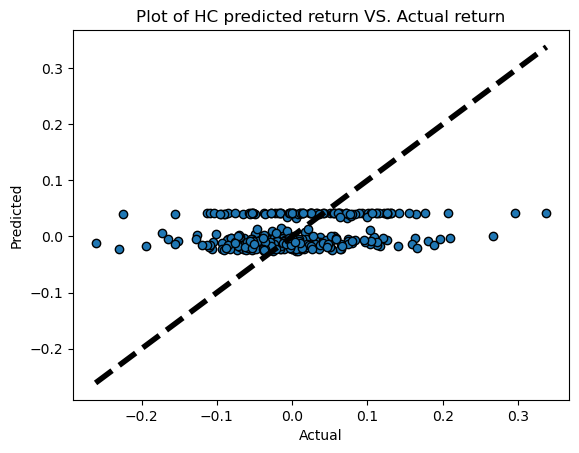

In [89]:
y = tested_HC_df["Return"]
predicted = tested_HC_df["y_pred"]
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Health Care Sector - Predicted Returns vs. Actual Returns")
plt.show()

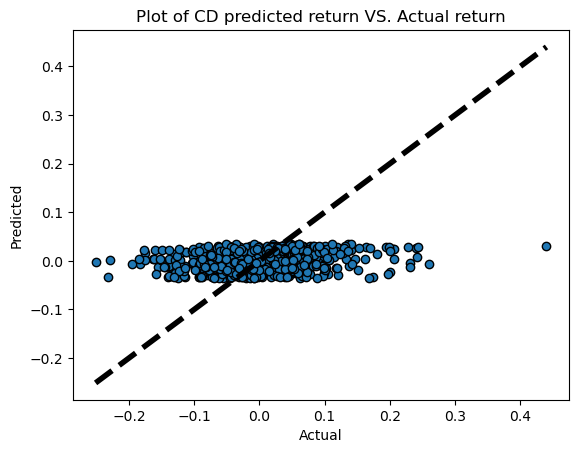

In [90]:
y = tested_CD_df["Return"]
predicted = tested_CD_df["y_pred"]
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title("Consumer Discretionary Sector - Predicted Returns vs. Actual Returns")
plt.show()

In [91]:

mmd1 = optimal_hyperparameter(features_selection(mm_HC1,"mm_HC"))
tested_mmHC_df=mmd1[0]
result1=mmd1[1]
print("mm_HC dataframe",tested_HC_df)

mmd2=optimal_hyperparameter(features_selection(mm_Energy1,"mm_Energy"))
tested_mmEnergy_df=mmd2[0]
result2=mmd2[1]
print("mm_Energy dataframe",tested_Energy_df)

mmd3 = optimal_hyperparameter(features_selection(mm_CD1,"mm_CD"))
tested_mmCD_df=mmd3[0]
result3=mmd3[1]
print("mm_CD dataframe",tested_HC_df)

mmd4 = optimal_hyperparameter(features_selection(mm_Util1,"mm_Util"))
tested_mmUtil_df=mmd4[0]
result4=mmd4[1]
print("mm_Util dataframe",tested_Util_df)

mmd5 = optimal_hyperparameter(features_selection(mm_CS1,"mm_CS"))
tested_mmCS_df=mmd5[0]
result5=mmd5[1]
print("mm_CS dataframe",tested_CS_df)

mmd6 = optimal_hyperparameter(features_selection(mm_IT1,"mm_IT"))
tested_mmIT_df=mmd6[0]
result6=mmd6[1]
print("mm_IT dataframe",tested_IT_df)

mmd7 = optimal_hyperparameter(features_selection(mm_Indus1,"mm_Indus"))
tested_mmIndus_df=mmd7[0]
result7=mmd7[1]
print("mm_Indus dataframe",tested_Indus_df)

mmd8 = optimal_hyperparameter(features_selection(mm_Finan1,"mm_Finan"))
tested_mmFinan_df=mmd8[0]
result8=mmd8[1]
print("mm_Finan dataframe",tested_Finan_df)

mmd9 = optimal_hyperparameter(features_selection(mm_Mat1,"mm_Mat"))
tested_mmMat_df=mmd9[0]
result9=mmd9[1]
print("mm_Mat dataframe",tested_Mat_df)

mmd10 = optimal_hyperparameter(features_selection(mm_TS1,"mm_TS"))
tested_mmTS_df=mmd10[0]
result10=mmd10[1]
print("mm_TS dataframe",tested_TS_df)

first 10 most important features with scores for sector  mm_HC is [(0.14, 'volume_ratio'), (0.07, 'turnover_rate'), (0.03, 'q_op_yoy'), (0.03, 'ps'), (0.02, 'total_mv'), (0.02, 'q_profit_yoy'), (0.02, 'q_profit_qoq'), (0.02, 'q_investincome'), (0.02, 'pe'), (0.02, 'pb')]
selected_features for sector  mm_HC is:  ['volume_ratio', 'turnover_rate', 'q_op_yoy', 'ps', 'total_mv']


/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_HC dataframe                  volume_ratio  turnover_rate        pe         pb  dv_ratio  \
month   ts_code                                                               
2021-10 000538       1.159375       0.790625  0.045781   3.246875  3.172500   
        300015       1.076250       0.885000  0.006606  25.305000  0.177500   
        600276       0.969375       0.918750  0.019433   9.737500  0.311875   
        000999       1.290625       0.786875  0.059873   1.825625  1.576875   
        600867       1.424375       1.096875  0.041333   3.922500  1.794375   
...                       ...            ...       ...        ...       ...   
2023-02 002399       1.007500       0.252500  0.011899   1.637000  0.251579   
        600535       1.331500       1.151500  0.125838   1.543500  2.617895   
        600085       0.993500       0.614500  0.019038   5.668000  0.615789   
        600252       1.017500       0.536000  0.032420   1.444000  0.986316   
        300003       0.843000       

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_Energy dataframe                  volume_ratio  turnover_rate        pb        pe        ps  \
month   ts_code                                                              
2021-10 601808       0.901250       0.447500  1.935625  0.036301  2.575625   
        600688       0.922500       0.818750  1.542500  0.013809  0.609375   
        600583       1.018125       1.711875  0.972500  0.016508  1.236875   
        600871       0.790000       0.693125  6.243125  0.001708  0.680625   
        600256       0.932500       3.811250  2.575000  0.027996  3.170000   
...                       ...            ...       ...       ...       ...   
2023-02 600871       0.966000       0.319500  5.305500  0.004444  0.581500   
        601898       1.019000       0.289000  0.866500  0.116538  0.493500   
        600028       1.018000       0.094500  0.700500  0.130459  0.200500   
        600583       0.988500       0.496500  1.308500  0.012272  1.522500   
        600688       0.928500       0.206500

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_CD dataframe                  volume_ratio  turnover_rate        pe         pb  dv_ratio  \
month   ts_code                                                               
2021-10 000538       1.159375       0.790625  0.045781   3.246875  3.172500   
        300015       1.076250       0.885000  0.006606  25.305000  0.177500   
        600276       0.969375       0.918750  0.019433   9.737500  0.311875   
        000999       1.290625       0.786875  0.059873   1.825625  1.576875   
        600867       1.424375       1.096875  0.041333   3.922500  1.794375   
...                       ...            ...       ...        ...       ...   
2023-02 002399       1.007500       0.252500  0.011899   1.637000  0.251579   
        600535       1.331500       1.151500  0.125838   1.543500  2.617895   
        600085       0.993500       0.614500  0.019038   5.668000  0.615789   
        600252       1.017500       0.536000  0.032420   1.444000  0.986316   
        300003       0.843000       

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_Util dataframe                  volume_ratio        pb  turnover_rate         ps  dv_ratio  \
month   ts_code                                                               
2021-10 600642       0.840625  1.056250       1.078125   1.648125  3.338750   
        600021       0.970625  1.620625       3.250000   1.126250  1.252500   
        600795       0.915625  1.111875       1.316250   0.444375  1.908750   
        000883       0.868125  1.103125       1.313750   1.926875  1.987500   
        600011       0.972500  1.550000       1.404375   0.660625  1.901250   
...                       ...       ...            ...        ...       ...   
2023-02 600863       0.980000  1.622000       0.833500   1.225000  2.814737   
        000883       1.155500  0.905000       0.321500   1.260000  3.456842   
        601016       0.946000  1.693000       0.749500   7.244000  1.076316   
        600674       1.017500  1.766500       0.150500  44.703500  3.120526   
        600795       0.883500  1.4

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_CS dataframe                  volume_ratio  turnover_rate         ps         pb  dv_ratio  \
month   ts_code                                                                
2021-10 002568       1.018750       1.246250  25.222500  14.648125  0.641875   
        000729       1.038750       0.569375   1.686250   1.368750  0.338125   
        600873       0.973750       0.850000   1.156250   2.077500  4.036875   
        000876       0.873125       1.931250   0.591875   1.942500  0.957500   
        600519       0.907500       0.281250  24.598750  14.113125  0.916250   
...                       ...            ...        ...        ...       ...   
2023-02 600518       0.869500       0.472000   7.300500   3.357000  0.000000   
        000729       1.011500       1.204000   3.051500   2.613000  0.308947   
        601607       1.116500       0.609000   0.325000   1.060000  2.207895   
        000876       0.950500       0.524000   0.475500   2.414500  0.000000   
        002385       1.0

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_IT dataframe                  volume_ratio        pb  turnover_rate        ps  \
month   ts_code                                                    
2021-10 600718       0.977500  1.402500       0.516875  1.551250   
        000725       1.017500  1.651250       1.475625  1.436875   
        002241       1.167500  5.763750       1.618125  2.459375   
        002415       1.028750  9.450625       0.310000  8.068750   
        002065       1.135625  2.259375       0.985000  2.572500   
...                       ...       ...            ...       ...   
2023-02 600718       1.092500  1.400000       1.975000  1.523500   
        002152       1.120000  2.330500       1.326500  3.915000   
        600271       0.992000  1.687500       0.899500  0.963000   
        600100       1.320500  1.218000       3.639000  0.645500   
        000725       0.929500  1.253000       0.990500  0.716000   

                     total_mv    Return      close    y_pred  
month   ts_code                     

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_Indus dataframe                  volume_ratio  turnover_rate      total_mv        pb  \
month   ts_code                                                        
2021-10 601179       0.919375       1.582500  2.757725e+06  1.385000   
        600089       1.050625       4.155625  8.999230e+06  2.531875   
        300024       1.095625       0.814375  1.612020e+06  3.556250   
        000009       1.171875       5.244375  4.768967e+06  6.290625   
        002081       1.073750       0.541875  1.660407e+06  0.965000   
...                       ...            ...           ...       ...   
2023-02 601006       0.956000       0.139500  9.982411e+06  0.800500   
        600089       0.981000       0.979000  8.263608e+06  1.653500   
        600739       0.991000       0.429500  2.055165e+06  0.714000   
        601333       0.956500       0.559500  1.571483e+06  0.596000   
        600783       1.161000       1.356500  1.036223e+06  2.501000   

                      circ_mv    Return     

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_Finan dataframe                  volume_ratio        ps  dv_ratio  turnover_rate        pb  \
month   ts_code                                                              
2021-10 000783       0.960625  5.287500  2.017500       0.420000  1.431250   
        600015       1.036250  0.914375  4.394375       0.136250  0.389375   
        601818       0.956250  1.308750  5.965000       0.192500  0.527500   
        601211       0.980000  4.538750  2.151250       0.521250  1.240625   
        002673       0.800625  6.893750  0.618750       0.593125  1.352500   
...                       ...       ...       ...            ...       ...   
2023-02 601998       0.928000  1.181000  6.112105       0.057500  0.441500   
        601166       0.937500  1.603500  6.058421       0.281500  0.554500   
        601601       0.953500  0.590000  3.696842       0.316000  1.173000   
        601901       0.971500  6.615000  0.578947       0.380000  1.321500   
        600383       0.998000  0.442500  6.48

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


mm_Mat dataframe                  volume_ratio  turnover_rate  dv_ratio       circ_mv  \
month   ts_code                                                        
2021-10 600019       0.932500       0.713125  3.627500  1.719375e+07   
        600489       0.955000       0.881250  0.213750  3.754888e+06   
        000792       1.001875       1.507500  0.000000  1.640545e+07   
        601216       0.858750       0.964375  6.472500  4.569714e+06   
        600585       0.933750       0.622500  4.998750  1.601706e+07   
...                       ...            ...       ...           ...   
2023-02 000630       0.946000       1.296000  2.924211  3.599496e+06   
        601216       0.911500       0.343000  3.661579  3.731291e+06   
        601992       1.008500       0.333500  4.027368  2.150213e+06   
        600547       0.899500       0.599000  0.259474  6.951659e+06   
        000898       1.072000       0.392000  7.613158  2.304154e+06   

                     total_mv    Return      c

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2384365795.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["y_pred"]=y_pred


In [92]:
mm_result_list = [result1,result2,result3,result4,result5,result6,result7,result8,result9,result10]
mm_result_final= pd.concat(mm_result_list)
mm_result_final

,Original MSE,Original MAE,Original R2,Features selected MSE,Features selected MAE,Features selected R2,tuned n_estimator,tuned min_leaf,tuned MSE,tuned MAE,tuned R2
mm_HC,0.01,0.07,0.00,0.01,0.07,0.00,140,0.10,0.01,0.06,0.05
mm_Energy,0.01,0.06,0.02,0.01,0.07,0.02,40,0.05,0.01,0.06,0.01
mm_CD,0.01,0.06,0.05,0.01,0.06,0.05,110,0.10,0.01,0.06,0.07
mm_Util,0.01,0.06,0.01,0.01,0.07,0.01,10,0.05,0.01,0.06,0.01
mm_CS,0.01,0.07,0.01,0.01,0.07,0.01,120,0.30,0.01,0.06,0.02
mm_IT,0.01,0.09,0.06,0.01,0.08,0.06,50,0.20,0.01,0.08,0.01
mm_Indus,0.01,0.07,0.01,0.01,0.07,0.01,40,0.05,0.01,0.06,0.06
mm_Finan,0.00,0.05,0.03,0.00,0.05,0.03,50,0.25,0.00,0.05,0.00
mm_Mat,0.01,0.06,0.01,0.01,0.06,0.01,10,0.15,0.01,0.06,0.00
mm_TS,0.00,0.05,0.03,0.01,0.07,0.03,20,0.10,0.00,0.05,0.04


In [93]:
tested_mmCS_df

volume_ratio  turnover_rate       netdebt  q_netprofit_qoq  \
month   ts_code                                                               
2021-10 600827       0.957500       0.608750  6.394043e+08         152.5289   
        000729       1.038750       0.569375 -5.017947e+09        -221.9553   
        600873       0.973750       0.850000  2.417051e+09         217.2129   
        601933       0.965000       0.380625  2.970191e+10         -61.2560   
        000895       1.206875       2.148750 -4.477512e+09          54.2981   
...                       ...            ...           ...              ...   
2022-12 000895       1.064500       0.314091 -1.735003e+09          16.4634   
        600600       0.925789       0.625455 -1.748186e+10        -139.3219   
        300146       1.047368       1.460000 -2.936753e+09        -122.1506   
        600873       1.006000       1.030455  6.833581e+08          10.8916   
        601607       0.927500       1.364545  1.722040e+10         -28.1726   

                       pe    Return       close    y_pred  
month   ts_code                                            
2021-10 600827   0.032626  0.010962   13.699375 -0.002369  
        000729   0.010693  0.061493    6.536250  0.008857  
        600873   0.049906  0.061842    6.356875  0.019048  
        601933   0.049488  0.009722    3.997500 -0.004119  
        000895   0.065073  0.090893   27.771250  0.032575  
...                   ...       ...         ...       ...  
2022-12 000895   0.054977  0.004367   25.551364  0.011158  
        600600   0.021540 -0.011764  107.421364 -0.004119  
        300146   0.046456  0.073343   22.234545  0.030826  
        600873   0.073834 -0.014759   10.478182  0.018774  
        601607   0.073057 -0.024717   18.886818  0.017299  

[243 rows x 8 columns]

In [94]:
def prepare(df):
    qq=df.reindex(columns=['y_pred'])
    d = pd.DataFrame(columns=['ts_code', 'month', 'y_pred'], index=range(len(qq)))
    c = 0

    for i in qq.iterrows():
        d.loc[c, 'ts_code'] = i[0][1]
        d.loc[c, 'month'] = i[0][0]
        d.loc[c, 'y_pred'] = i[1]['y_pred']
        c += 1
    d['month'] = pd.to_datetime(d['month'], format='%Y-%m').dt.to_period('M')
    d['ts_code']=d['ts_code'].astype(int)
    d = d.sort_values(['month', 'ts_code'], ascending=[True, True]).reset_index(drop=True)
    return d

In [95]:
List_of_df=[]
List_of_df.append(prepare(tested_Energy_df))
List_of_df.append(prepare(tested_HC_df))
List_of_df.append(prepare(tested_CD_df))
List_of_df.append(prepare(tested_Util_df))
List_of_df.append(prepare(tested_CS_df))
List_of_df.append(prepare(tested_IT_df))
List_of_df.append(prepare(tested_Indus_df))
List_of_df.append(prepare(tested_Finan_df))
List_of_df.append(prepare(tested_Mat_df))
List_of_df.append(prepare(tested_TS_df))
Final_df=pd.concat(List_of_df).sort_values(['month', 'ts_code'], ascending=[True, True]).reset_index(drop=True)

In [96]:
mo=Final_df['month'][0]
loc=0
Lss=[]
for i in range(len(Final_df)):
    if Final_df['month'][i]!=mo:
        tem=Final_df.iloc[loc:i, :].copy()
        tem['rank']=tem['y_pred'].rank(ascending=False)
        tem.loc[tem['y_pred'] < 0, 'rank'] = -tem['rank']
        Lss.append(tem)
        loc=i
        mo=Final_df['month'][i]
w=Final_df['month'][len(Final_df)-1]
for i in range(len(Final_df)):
    if Final_df['month'][i]==w:
        tem=Final_df.iloc[i:len(Final_df), :].copy()
        tem['rank']=tem['y_pred'].rank(ascending=False)
        tem.loc[tem['y_pred'] < 0, 'rank'] = -tem['rank']
        Lss.append(tem)
        w=0
dff=pd.concat(Lss)

In [97]:
def generate_numbers(n, increment):
    numbers = [0] * n
    numbers[0] = increment
    for i in range(1, n):
        numbers[i] = numbers[i-1] + increment
    total = sum(numbers)
    numbers = [x/total for x in numbers]
    return numbers

In [98]:
import math
def get_position(df,threshold1,threshold2):
    df=df.reset_index(drop=True)
    df['abs_rank'] = df['rank'].abs()
    df = df.assign(position=[-2] * len(df))
    n_stocks=df['abs_rank'].max()
    th1=round(threshold1*n_stocks)
    th2=n_stocks-round(threshold2*n_stocks)
    for i in range(len(df)):
        if df['abs_rank'][i]<=th1 and df['rank'][i]>0:
            df['position'][i]=1
        if df['abs_rank'][i]>=th2 and df['rank'][i]<0:
            df['position'][i]=-1
    nlong=0
    nshort=0
    for i in range(len(df)):
        if df['position'][i]==1:
            nlong+=1
        if df['position'][i]==-1:
            nshort+=1
    df=df.sort_values(['month', 'position','abs_rank'], ascending=[True, False,False]).reset_index(drop=True)
    a=generate_numbers(nlong,0.1)

    for i in range(nlong):
        df['position'][i]=a[i]
    
    b=generate_numbers(nshort,0.1)
    negative_values = [-x for x in b]
    normalized_integers_short = sorted(negative_values)
    
    for i in range(nlong,nlong+nshort):
        df['position'][i]=normalized_integers_short[i-nlong]
    for i in range(len(df)):
        if df['position'][i]==-2:
            df['position'][i]=0
    df = df.reindex(columns=['month','ts_code','y_pred','rank','position'])
    return df

In [99]:
mo=dff['month'][0]
loc=0
Lss=[]
for i in range(len(dff)):
    if dff['month'][i]!=mo:
        tem=dff.iloc[loc:i, :].copy()
        Lss.append(get_position(tem,0.3,0.15))
        loc=i
        mo=dff['month'][i]
w=dff['month'][len(dff)-1]
for i in range(len(dff)):
    if dff['month'][i]==w:
        tem=dff.iloc[i:len(dff), :].copy()
        Lss.append(get_position(tem,0.3,0.15))
        w=0
df=pd.concat(Lss).reset_index(drop=True)

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'][i]=1
/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'][i]=-1
/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positio

In [100]:
df=string_converter(df)
df.to_csv('Positions_without_fin.csv',index=False)

In [101]:
List_of_df=[]
List_of_df.append(prepare(tested_mmEnergy_df))
List_of_df.append(prepare(tested_mmHC_df))
List_of_df.append(prepare(tested_mmCD_df))
List_of_df.append(prepare(tested_mmUtil_df))
List_of_df.append(prepare(tested_mmCS_df))
List_of_df.append(prepare(tested_mmIT_df))
List_of_df.append(prepare(tested_mmIndus_df))
List_of_df.append(prepare(tested_mmFinan_df))
List_of_df.append(prepare(tested_mmMat_df))
List_of_df.append(prepare(tested_mmTS_df))
Final_df=pd.concat(List_of_df).sort_values(['month', 'ts_code'], ascending=[True, True]).reset_index(drop=True)

In [102]:
mo=Final_df['month'][0]
loc=0
Lss=[]
for i in range(len(Final_df)):
    if Final_df['month'][i]!=mo:
        tem=Final_df.iloc[loc:i, :].copy()
        tem['rank']=tem['y_pred'].rank(ascending=False)
        tem.loc[tem['y_pred'] < 0, 'rank'] = -tem['rank']
        Lss.append(tem)
        loc=i
        mo=Final_df['month'][i]
w=Final_df['month'][len(Final_df)-1]
for i in range(len(Final_df)):
    if Final_df['month'][i]==w:
        tem=Final_df.iloc[i:len(Final_df), :].copy()
        tem['rank']=tem['y_pred'].rank(ascending=False)
        tem.loc[tem['y_pred'] < 0, 'rank'] = -tem['rank']
        Lss.append(tem)
        w=0
dff=pd.concat(Lss)

In [103]:
mo=dff['month'][0]
loc=0
Lss=[]
for i in range(len(dff)):
    if dff['month'][i]!=mo:
        tem=dff.iloc[loc:i, :].copy()
        Lss.append(get_position(tem,0.3,0.15))
        loc=i
        mo=dff['month'][i]
w=dff['month'][len(dff)-1]
for i in range(len(dff)):
    if dff['month'][i]==w:
        tem=dff.iloc[i:len(dff), :].copy()
        Lss.append(get_position(tem,0.3,0.15))
        w=0
df_with_fin=pd.concat(Lss).reset_index(drop=True)

/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'][i]=1
/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'][i]=-1
/var/folders/7q/jc3ymw451_z2shd7snhgzc3r0000gn/T/ipykernel_36199/2108379383.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positio

In [104]:
df_with_fin=string_converter(df_with_fin)
df_with_fin.to_csv('Positions_with_fin.csv',index=False)